# Contributor: Ragavendar Kumar

## First Analysis: Wine Enthusiast Magazine Dataset

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
rk1_data_to_load = "./csvs/raw_df.csv"

raw_df = pd.read_csv(rk1_data_to_load)

raw_df.head()

country                                        description  \
0     Italy  Aromas include tropical fruit, broom, brimston...   
1  Portugal  This is ripe and fruity, a wine that is smooth...   
2        US  Tart and snappy, the flavors of lime flesh and...   
3        US  Pineapple rind, lemon pith and orange blossom ...   
4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2  \
0                 Etna                NaN   
1                  NaN                NaN   
2    Willamette Valley  Willamette Valley   
3  Lake Michigan Shore                NaN   
4    Willamette Valley  Willamette Valley   

                                               title         variety  \
0                  Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1      Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2      Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3  St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4  Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   

                winery  
0              Nicosia  
1  Quinta dos Avidagos  
2            Rainstorm  
3           St. Julian  
4         Sweet Cheeks

## Location - How does it impact quality and price of wine?

In [3]:
country_df = raw_df # Create a copy of raw dataframe
country_df = country_df.dropna(subset=['country', 'price']) # Drop all rows when the columns 'country' and 'price' are na
country_df.head()# take mean scores and plot pie chart

country                                        description  \
1  Portugal  This is ripe and fruity, a wine that is smooth...   
2        US  Tart and snappy, the flavors of lime flesh and...   
3        US  Pineapple rind, lemon pith and orange blossom ...   
4        US  Much like the regular bottling from 2012, this...   
5     Spain  Blackberry and raspberry aromas show a typical...   

                          designation  points  price        province  \
1                            Avidagos      87   15.0           Douro   
2                                 NaN      87   14.0          Oregon   
3                Reserve Late Harvest      87   13.0        Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0          Oregon   
5                        Ars In Vitro      87   15.0  Northern Spain   

              region_1           region_2  \
1                  NaN                NaN   
2    Willamette Valley  Willamette Valley   
3  Lake Michigan Shore                NaN   
4    Willamette Valley  Willamette Valley   
5              Navarra                NaN   

                                               title             variety  \
1      Quinta dos Avidagos 2011 Avidagos Red (Douro)      Portuguese Red   
2      Rainstorm 2013 Pinot Gris (Willamette Valley)          Pinot Gris   
3  St. Julian 2013 Reserve Late Harvest Riesling ...            Riesling   
4  Sweet Cheeks 2012 Vintner's Reserve Wild Child...          Pinot Noir   
5  Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...  Tempranillo-Merlot   

                winery  
1  Quinta dos Avidagos  
2            Rainstorm  
3           St. Julian  
4         Sweet Cheeks  
5               Tandem

In [4]:
grp_country_df = country_df.groupby('country')
grp_country_df = grp_country_df.mean()
grp_country_pts_df = grp_country_df.sort_values(by=['points'], ascending = False)
grp_country_pts_df.head()

points      price
country                      
England  91.550725  51.681159
India    90.222222  13.333333
Austria  90.190782  30.762772
Germany  89.836321  42.257547
Canada   89.377953  35.712598

In [5]:
grp_country_price_df = grp_country_df.sort_values(by=['price'])
grp_country_price_df.head()

points      price
country                                     
Ukraine                 84.071429   9.214286
Bosnia and Herzegovina  86.500000  12.500000
India                   90.222222  13.333333
Armenia                 87.500000  14.500000
Bulgaria                87.936170  14.645390

In [6]:
grp_country_value_df = grp_country_df
grp_country_value_df['value'] = grp_country_value_df['points']/ grp_country_value_df['price']
grp_country_value_df = grp_country_value_df.sort_values(by=['value'], ascending = False)
grp_country_value_df.head()

points      price     value
country                                               
Ukraine                 84.071429   9.214286  9.124031
Bosnia and Herzegovina  86.500000  12.500000  6.920000
India                   90.222222  13.333333  6.766667
Armenia                 87.500000  14.500000  6.034483
Bulgaria                87.936170  14.645390  6.004358

## Charts

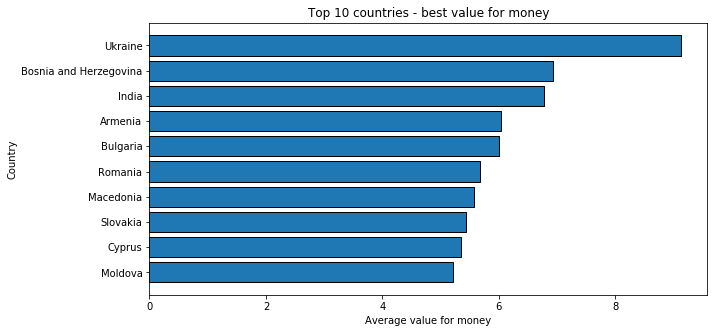

In [7]:
grp_country_value_bar_df = grp_country_value_df.head(10)
grp_country_value_bar_df = grp_country_value_bar_df.sort_values(by=['value'])
#y_axis = grp_country_value_bar_df.index
x_axis = grp_country_value_bar_df['value']
y_axis = grp_country_value_bar_df.index
plt.figure(figsize = (10,5))
plt.barh(y_axis, x_axis, edgecolor = "black")
plt.title("Top 10 countries - best value for money")
plt.xlabel("Average value for money")
plt.ylabel("Country")
plt.savefig("./savedfigures/130k_Top 10 countries_best value for money.png")
plt.show()

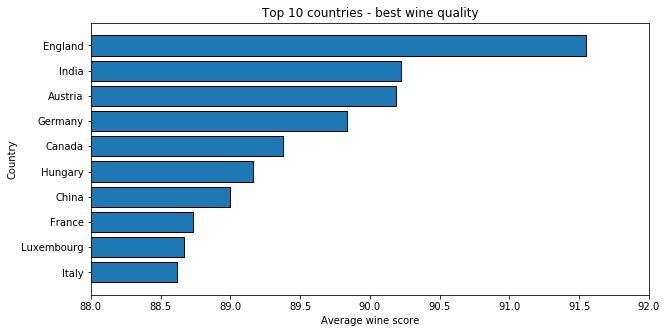

In [8]:
grp_country_pts_bar_df = grp_country_pts_df.head(10)
grp_country_pts_bar_df = grp_country_pts_bar_df.sort_values(by=['points'])
x_axis = grp_country_pts_bar_df['points']
y_axis = grp_country_pts_bar_df.index
plt.figure(figsize = (10,5))
plt.barh(y_axis, x_axis, edgecolor = "black")
plt.xlim(88,92)
plt.title("Top 10 countries - best wine quality")
plt.xlabel("Average wine score")
plt.ylabel("Country")
plt.savefig("./savedfigures/130k_Top 10 countries_best wine quality.png")
plt.show()

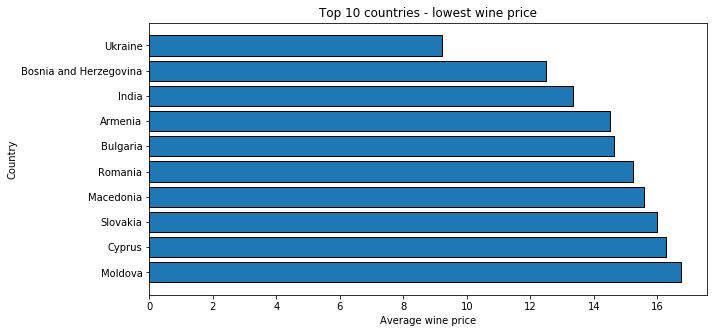

In [9]:
grp_country_price_bar_df = grp_country_price_df.head(10)
grp_country_price_bar_df = grp_country_price_bar_df.sort_values(by=['price'],ascending = False)
x_axis = grp_country_price_bar_df['price']
y_axis = grp_country_price_bar_df.index
plt.figure(figsize = (10,5))
plt.barh(y_axis, x_axis, edgecolor = "black")
plt.title("Top 10 countries - lowest wine price")
plt.xlabel("Average wine price")
plt.ylabel("Country")
plt.savefig("./savedfigures/130k_Top 10 countries_lowest wine price.png")
plt.show()

---X---

## Price - How does it impact quality of wine?

In [10]:
price_df = raw_df # Create a copy of raw dataframe
price_df = price_df.dropna(subset=['price']) # Drop all rows when the columns 'price' is na
price_df.head()

country                                        description  \
1  Portugal  This is ripe and fruity, a wine that is smooth...   
2        US  Tart and snappy, the flavors of lime flesh and...   
3        US  Pineapple rind, lemon pith and orange blossom ...   
4        US  Much like the regular bottling from 2012, this...   
5     Spain  Blackberry and raspberry aromas show a typical...   

                          designation  points  price        province  \
1                            Avidagos      87   15.0           Douro   
2                                 NaN      87   14.0          Oregon   
3                Reserve Late Harvest      87   13.0        Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0          Oregon   
5                        Ars In Vitro      87   15.0  Northern Spain   

              region_1           region_2  \
1                  NaN                NaN   
2    Willamette Valley  Willamette Valley   
3  Lake Michigan Shore                NaN   
4    Willamette Valley  Willamette Valley   
5              Navarra                NaN   

                                               title             variety  \
1      Quinta dos Avidagos 2011 Avidagos Red (Douro)      Portuguese Red   
2      Rainstorm 2013 Pinot Gris (Willamette Valley)          Pinot Gris   
3  St. Julian 2013 Reserve Late Harvest Riesling ...            Riesling   
4  Sweet Cheeks 2012 Vintner's Reserve Wild Child...          Pinot Noir   
5  Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...  Tempranillo-Merlot   

                winery  
1  Quinta dos Avidagos  
2            Rainstorm  
3           St. Julian  
4         Sweet Cheeks  
5               Tandem

## Charts

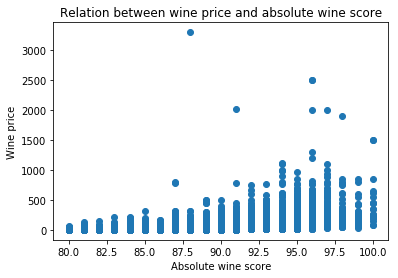

In [11]:
x_axis = price_df['points']
y_axis = price_df['price']
plt.scatter(x_axis, y_axis, marker="o")
plt.title("Relation between wine price and absolute wine score")
plt.xlabel("Absolute wine score")
plt.ylabel("Wine price")
plt.show()

In [12]:
grp_price_df = price_df.groupby('points')
grp_price_df = grp_price_df.mean()
grp_price_df.head()

price
points           
80      16.372152
81      17.182353
82      18.870767
83      18.237353
84      19.310215

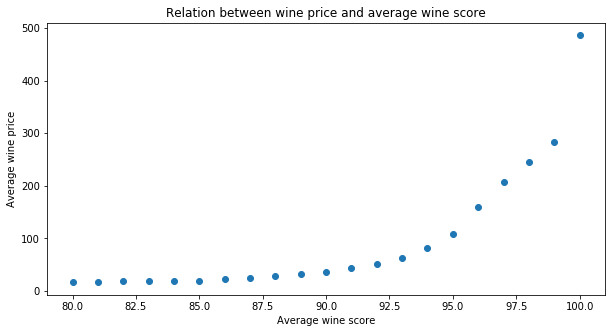

In [13]:
x_axis = grp_price_df.index
y_axis = grp_price_df['price']
plt.figure(figsize = (10,5))
plt.scatter(x_axis, y_axis, marker="o")
plt.title("Relation between wine price and average wine score")
plt.xlabel("Average wine score")
plt.ylabel("Average wine price")
plt.savefig("./savedfigures/130k_Relation_between_wine_price_and_average_wine_score.png")
plt.show()

---X---

## Age - How does it impact quality and price of wine?

In [14]:
# Define a function to parse year from a string

year_low = 1950
year_high = 2020

def year_parse(var):
    numbers = re.findall('\d+',var)
    numbers = set([int(n) for n in numbers])
    if len(numbers)>0 and max(numbers)>year_low and max(numbers)<2020:
        return max(numbers)
    else:
        return None

In [15]:

age_df = raw_df # Create a copy of raw dataframe
age_df['Year'] = age_df['title'].apply(year_parse, convert_dtype=False) # Apply year_parse function to 'title' column
age_df = age_df.dropna(subset=['Year', 'price']) # Drop all rows when the columns 'Year' and 'price' are na
age_df.head()

country                                        description  \
1  Portugal  This is ripe and fruity, a wine that is smooth...   
2        US  Tart and snappy, the flavors of lime flesh and...   
3        US  Pineapple rind, lemon pith and orange blossom ...   
4        US  Much like the regular bottling from 2012, this...   
5     Spain  Blackberry and raspberry aromas show a typical...   

                          designation  points  price        province  \
1                            Avidagos      87   15.0           Douro   
2                                 NaN      87   14.0          Oregon   
3                Reserve Late Harvest      87   13.0        Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0          Oregon   
5                        Ars In Vitro      87   15.0  Northern Spain   

              region_1           region_2  \
1                  NaN                NaN   
2    Willamette Valley  Willamette Valley   
3  Lake Michigan Shore                NaN   
4    Willamette Valley  Willamette Valley   
5              Navarra                NaN   

                                               title             variety  \
1      Quinta dos Avidagos 2011 Avidagos Red (Douro)      Portuguese Red   
2      Rainstorm 2013 Pinot Gris (Willamette Valley)          Pinot Gris   
3  St. Julian 2013 Reserve Late Harvest Riesling ...            Riesling   
4  Sweet Cheeks 2012 Vintner's Reserve Wild Child...          Pinot Noir   
5  Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...  Tempranillo-Merlot   

                winery  Year  
1  Quinta dos Avidagos  2011  
2            Rainstorm  2013  
3           St. Julian  2013  
4         Sweet Cheeks  2012  
5               Tandem  2011

In [16]:
#print(f"Number of records with no age information: {age_df['Year'].isna().sum()}")
print(f"The most aged wine recorded in the dataset is: {age_df['Year'].min()}")
print(f"The least aged wine recorded in the dataset is: {age_df['Year'].max()}")

The most aged wine recorded in the dataset is: 1952
The least aged wine recorded in the dataset is: 2017


## Charts

In [17]:
# Binning years
year_bins = [1950, 2000, 2005, 2010, 2015, 2021]
bin_labels = ["1951-2000", "2001-2005", "2006-2010", "2011-2015", "2016-2020"]
bin_df = age_df 
bin_df["Year bin"] = pd.cut(bin_df["Year"], year_bins, labels = bin_labels)
bin_df.head()

/Users/kurtshiple/anaconda3/envs/TestEnvironment/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


country                                        description  \
1  Portugal  This is ripe and fruity, a wine that is smooth...   
2        US  Tart and snappy, the flavors of lime flesh and...   
3        US  Pineapple rind, lemon pith and orange blossom ...   
4        US  Much like the regular bottling from 2012, this...   
5     Spain  Blackberry and raspberry aromas show a typical...   

                          designation  points  price        province  \
1                            Avidagos      87   15.0           Douro   
2                                 NaN      87   14.0          Oregon   
3                Reserve Late Harvest      87   13.0        Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0          Oregon   
5                        Ars In Vitro      87   15.0  Northern Spain   

              region_1           region_2  \
1                  NaN                NaN   
2    Willamette Valley  Willamette Valley   
3  Lake Michigan Shore                NaN   
4    Willamette Valley  Willamette Valley   
5              Navarra                NaN   

                                               title             variety  \
1      Quinta dos Avidagos 2011 Avidagos Red (Douro)      Portuguese Red   
2      Rainstorm 2013 Pinot Gris (Willamette Valley)          Pinot Gris   
3  St. Julian 2013 Reserve Late Harvest Riesling ...            Riesling   
4  Sweet Cheeks 2012 Vintner's Reserve Wild Child...          Pinot Noir   
5  Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...  Tempranillo-Merlot   

                winery  Year   Year bin  
1  Quinta dos Avidagos  2011  2011-2015  
2            Rainstorm  2013  2011-2015  
3           St. Julian  2013  2011-2015  
4         Sweet Cheeks  2012  2011-2015  
5               Tandem  2011  2011-2015

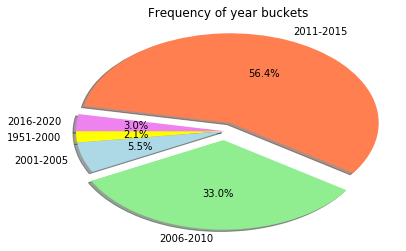

In [18]:
year_bucket_freq_lst = (bin_df.groupby('Year bin').count())['points']
pie_colors1 = ["yellow","lightblue", "lightgreen", "coral", "violet"]
# Build Pie Chart
plt.pie(year_bucket_freq_lst,
        labels=year_bucket_freq_lst.index,
        colors=pie_colors1,
        explode = (0,0,0.1,0.1,0),
        autopct="%1.1f%%",
        shadow=True,
        startangle=180)
plt.axis("tight")
plt.title("Frequency of year buckets")
plt.savefig("./savedfigures/130k_Frequency_of_year_buckets.png")

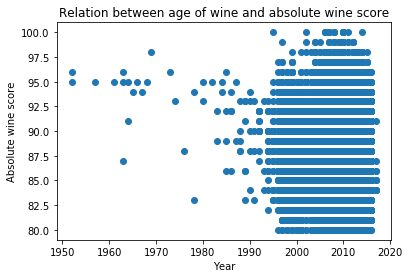

In [19]:
x_axis = age_df['Year']
y_axis = age_df['points']
plt.scatter(x_axis, y_axis, marker="o")
plt.title("Relation between age of wine and absolute wine score")
plt.xlabel("Year")
plt.ylabel("Absolute wine score")
plt.show()

In [20]:
grp_age_df = age_df.groupby('Year')
grp_age_df = grp_age_df.mean()
grp_age_df.head()

points       price
Year                       
1952  95.500000  457.000000
1957  95.000000  375.000000
1961  95.000000  320.000000
1963  92.666667  552.333333
1964  93.000000  356.500000

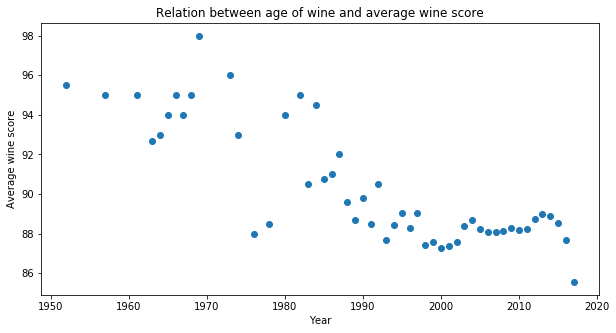

In [21]:
x_axis = grp_age_df.index
y_axis = grp_age_df['points']
plt.figure(figsize = (10,5))
plt.scatter(x_axis, y_axis, marker="o")
plt.title("Relation between age of wine and average wine score")
plt.xlabel("Year")
plt.ylabel("Average wine score")
plt.savefig("./savedfigures/130k_Relation_between_age_of_wine_and_average_wine_score.png")
plt.show()

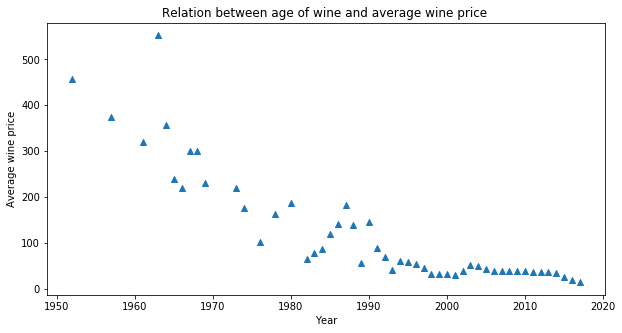

In [22]:
x_axis = grp_age_df.index
y_axis = grp_age_df['price']
plt.figure(figsize = (10,5))
plt.scatter(x_axis, y_axis, marker="^")
plt.title("Relation between age of wine and average wine price ")
plt.xlabel("Year")
plt.ylabel("Average wine price")
plt.savefig("./savedfigures/130k_Relation_between_age_of_wine_and_average_wine_price.png")
plt.show()

Limitation: Prices for older wines seemed to be low, which is unusual. This could be because the price data did not account for inflation. 
To avoid confusion, data points before 1950 were filtered out.


## Relation between wine quality and length of review

In [23]:
def str_length(sent):
        return len(sent.split())

In [24]:
rev_df = raw_df # Create a copy of raw dataframe
rev_df = rev_df.dropna(subset=['description']) # Drop all rows when the columns 'description' and 'points' are na
rev_df['Review length'] = rev_df['description'].apply(str_length) # Apply len (sent.split()) function to 'description' column
rev_df.head()

country                                        description  \
0     Italy  Aromas include tropical fruit, broom, brimston...   
1  Portugal  This is ripe and fruity, a wine that is smooth...   
2        US  Tart and snappy, the flavors of lime flesh and...   
3        US  Pineapple rind, lemon pith and orange blossom ...   
4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2  \
0                 Etna                NaN   
1                  NaN                NaN   
2    Willamette Valley  Willamette Valley   
3  Lake Michigan Shore                NaN   
4    Willamette Valley  Willamette Valley   

                                               title         variety  \
0                  Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1      Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2      Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3  St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4  Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   

                winery  Year  Review length  
0              Nicosia  2013             24  
1  Quinta dos Avidagos  2011             38  
2            Rainstorm  2013             28  
3           St. Julian  2013             33  
4         Sweet Cheeks  2012             41

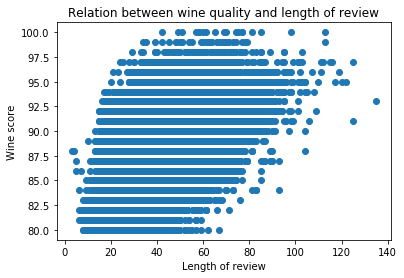

In [25]:
x_axis = rev_df['Review length']
y_axis = rev_df['points']
plt.scatter(x_axis, y_axis, marker="o")
plt.title("Relation between wine quality and length of review")
plt.xlabel("Length of review")
plt.ylabel("Wine score")
plt.show()

In [26]:
grp_rev_df = rev_df.groupby('points')
grp_rev_df = grp_rev_df.mean()
grp_rev_df.head()

price  Review length
points                          
80      16.372152      26.216625
81      17.182353      26.885838
82      18.870767      28.088780
83      18.237353      31.367603
84      19.310215      32.507562

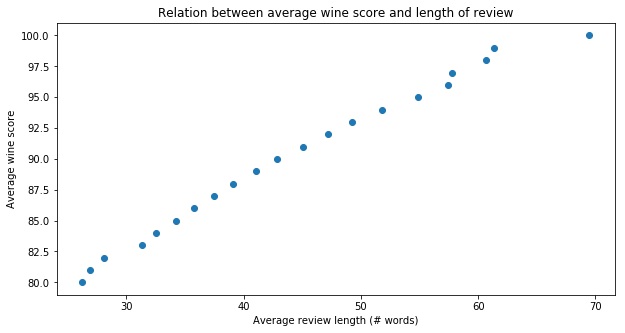

In [27]:
x_axis = grp_rev_df.index
y_axis = grp_rev_df['Review length']
plt.figure(figsize = (10,5))
plt.scatter(y_axis, x_axis, marker="o")
plt.title("Relation between average wine score and length of review")
plt.xlabel("Average review length (# words)")
plt.ylabel("Average wine score")
plt.savefig("./savedfigures/130k_Relation_between_average_wine_score_and_length_of_review.png")
plt.show()

# Second Preprocessing: ScienceDirect Physiochemical Composition Dataset 

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm # import statsmodels
import seaborn as sns

In [29]:
rk2_data_to_load = "./csvs/red_wine_data.csv"
red_wine_data = pd.read_csv(rk2_data_to_load)

rk3_data_to_load = "./csvs/white_wine_data.csv"
white_wine_data = pd.read_csv(rk3_data_to_load)

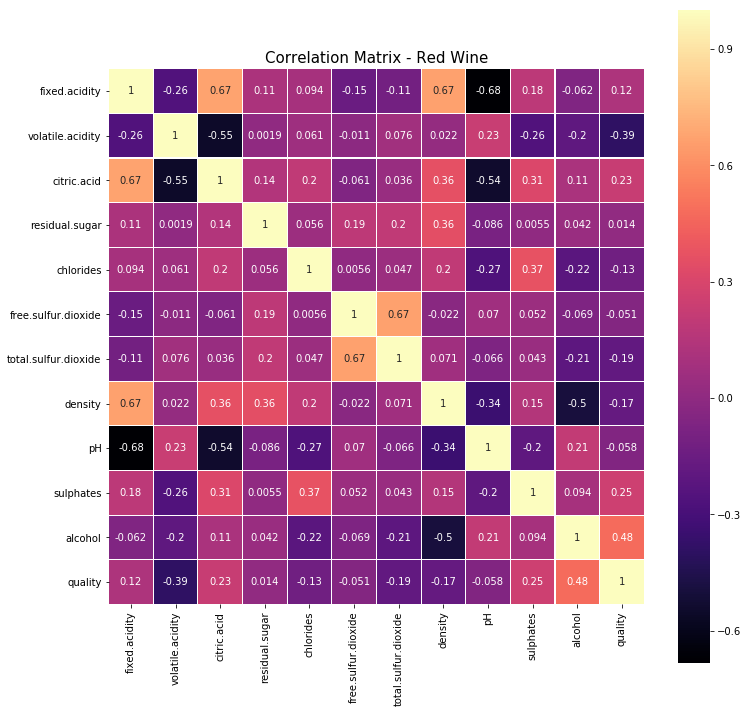

In [30]:
plt.figure(figsize=(12,12))
plt.title('Correlation Matrix - Red Wine', y=1, size=15)
sns.heatmap(red_wine_data.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, 
            linecolor='white', annot=True, cmap = "magma")
plt.savefig("./savedfigures/Correlation_Matrix_Red_Wine.png")

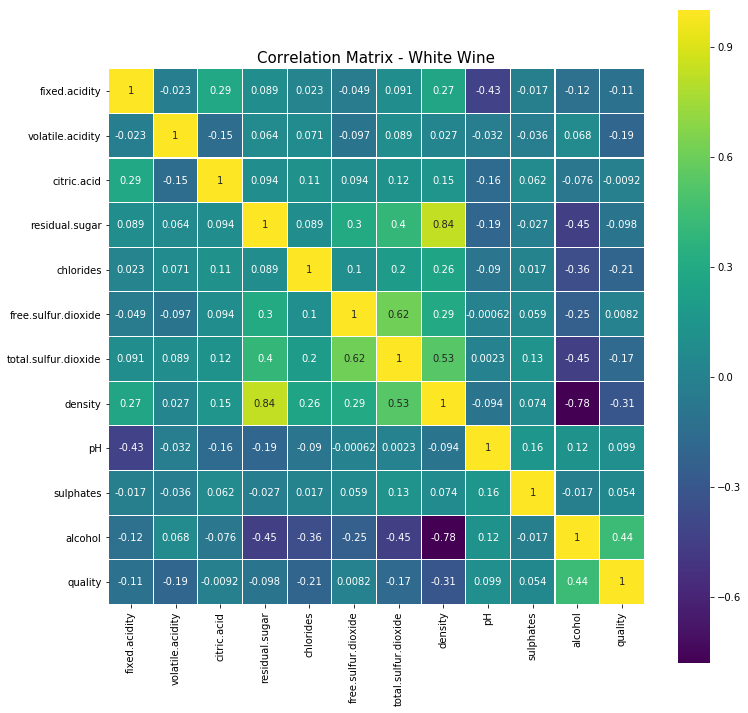

In [31]:
plt.figure(figsize=(12,12))
plt.title('Correlation Matrix - White Wine', y=1, size=15)
sns.heatmap(white_wine_data.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, 
            linecolor='white', annot=True, cmap = "viridis")
plt.savefig("./savedfigures/Correlation_Matrix_White_Wine.png")

# Contributor: Betsy Brown

# Wine Imports and Exports Analysis

In [32]:
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt

In [33]:
wine_imports_data_to_load = "./csvs/wineimports.csv"
wine_imports_df = pd.read_csv(wine_imports_data_to_load)

wine_exports_data_to_load = "./csvs/wineexports.csv"
wine_exports_df = pd.read_csv(wine_exports_data_to_load)

In [34]:
exporters_2016 = wine_exports_df.iloc[181,:]
top_exporters_2016 = exporters_2016 > 10
bottom_exporters_2016 = exporters_2016 <= 10
# top_exporters_2016.value_counts()
top_e_2016=exporters_2016[["France","Italy","Spain"]]
top_e_2016

def grab_columns_cond(df,cond,value):
    key_list=[]
    if cond == "g":
        df_new = df > value
    if cond == "ge":
        df_new = df >= value
    if cond == "l":
        df_new = df < value
    if cond == "le":
        df_new = df <= value
    if cond == "e":
        df_new = df == value
    if cond == "ne":
        df_new = df != value
    for i in range(0,df.size-1):
        if df_new[i].item()==True:
            key_list.append(df_new.index[i])
    result=df.loc[key_list]
    
    return result

result=grab_columns_cond(exporters_2016,'le',10)
# print(result)
rest_of_world = grab_columns_cond(exporters_2016,'le',10)
print(rest_of_world)

Portugal          2.648021
Austria           0.467136
Bel-Lux           0.347950
Denmark           0.320798
Germany           3.432018
Greece            0.285458
Ireland           0.038982
Sweden            0.069728
Switzerland       0.011793
United Kingdom    0.895747
Other WEM         0.054516
Bulgaria          0.274763
Croatia           0.034423
Georgia           0.358484
Hungary           0.644783
Moldova           1.270901
Romania           0.122685
Russia            0.046719
Other ECA         2.058664
Australia         7.150038
New Zealand       2.034424
Canada            0.684230
United States     4.247122
Argentina         2.478680
Brazil            0.021717
Chile             8.684588
Mexico            0.010983
Uruguay           0.032240
Other LAC         0.049845
Algeria           0.002177
Morocco           0.066076
South Africa      4.084101
Tunisia           0.005428
Turkey            0.040155
Other AME         0.308836
China             0.095401
Hong Kong         0.258898
I

In [35]:
France_2016 = exporters_2016['France']
France_2016

13.442070575458748

In [36]:
Italy_2016 = exporters_2016['Italy']
Italy_2016

19.638769776911364

In [37]:
Spain_2016 = exporters_2016['Spain']
Spain_2016

21.259444952675885

In [38]:
other_exports = rest_of_world.sum()
other_exports

43.87016753968728

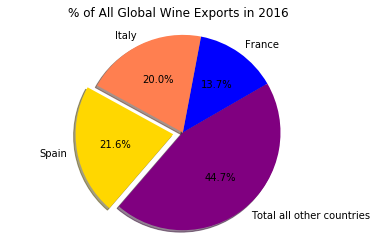

In [39]:
labels = ["France", "Italy", "Spain", "Total all other countries"]
sizes = [France_2016, Italy_2016, Spain_2016, other_exports]
colors = ["blue", "coral", "gold", "purple"]
explode = [0,0,0.1,0]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        
	autopct="%1.1f%%", shadow=True, startangle=30)
plt.axis("equal")
plt.title("% of All Global Wine Exports in 2016")
plt.savefig("./savedfigures/wineExports.png")
plt.show()


In [40]:
wine_imports_df.head()

0  France  Italy  Portugal  Spain  Austria  Bel-Lux  Denmark  Finland  \
0  1835     NaN    NaN       NaN    NaN      NaN      NaN      NaN      NaN   
1  1836     NaN    NaN       NaN    NaN      NaN      NaN      NaN      NaN   
2  1837     NaN    NaN       NaN    NaN      NaN      NaN      NaN      NaN   
3  1838     NaN    NaN       NaN    NaN      NaN      NaN      NaN      NaN   
4  1839     NaN    NaN       NaN    NaN      NaN      NaN      NaN      NaN   

   Germany  ...  Malaysia  Philippines  Singapore  Taiwan  Thailand  \
0      NaN  ...       NaN          NaN        NaN     NaN       NaN   
1      NaN  ...       NaN          NaN        NaN     NaN       NaN   
2      NaN  ...       NaN          NaN        NaN     NaN       NaN   
3      NaN  ...       NaN          NaN        NaN     NaN       NaN   
4      NaN  ...       NaN          NaN        NaN     NaN       NaN   

   Other Asia Pacific  Other  World  Unnamed: 55  Coeff. of variation  
0                 NaN    NaN    NaN          NaN                  NaN  
1                 NaN    NaN    NaN          NaN                  NaN  
2                 NaN    NaN    NaN          NaN                  NaN  
3                 NaN    NaN    NaN          NaN                  NaN  
4                 NaN    NaN    NaN          NaN                  NaN  

[5 rows x 57 columns]

In [41]:
importers_2016 = wine_imports_df.iloc[181,:]
importers_2016

0                      2016.000000
France                    7.443140
Italy                     1.604883
Portugal                  1.686484
Spain                     0.727834
Austria                   0.000000
Bel-Lux                   2.920726
Denmark                   1.807552
Finland                   0.000000
Germany                  13.661460
Greece                    0.195726
Ireland                   1.110055
Netherlands               3.580245
Sweden                    2.057401
Switzerland               1.741930
United Kingdom           13.662562
Other WEM                 0.949561
Bulgaria                  0.068971
Croatia                   0.291998
Georgia                   0.001545
Hungary                   0.200604
Moldova                   0.009760
Romania                   0.472988
Russia                    3.768679
Ukraine                   0.000000
Other ECA                 5.674589
Australia                 0.823400
New Zealand               0.350600
Canada              

In [42]:
importers_2016 = wine_imports_df.iloc[181,:]
top_importers_2016 = importers_2016 > 10
bottom_importers_2016 = importers_2016 <= 10
# top_exporters_2016.value_counts()
top_i_2016=importers_2016[["Germany","United Kingdom","United States"]]
top_i_2016

def grab_columns_cond(df,cond,value):
    key_list=[]
    if cond == "g":
        df_new = df > value
    if cond == "ge":
        df_new = df >= value
    if cond == "l":
        df_new = df < value
    if cond == "le":
        df_new = df <= value
    if cond == "e":
        df_new = df == value
    if cond == "ne":
        df_new = df != value
    for j in range(0,df.size-1):
        if df_new[j].item()==True:
            key_list.append(df_new.index[j])
    result=df.loc[key_list]
    
    return result

result=grab_columns_cond(importers_2016,'le',10)
# print(result)
rest_of_world_imp=grab_columns_cond(importers_2016,'le',10)
print(rest_of_world_imp)

France                7.443140
Italy                 1.604883
Portugal              1.686484
Spain                 0.727834
Austria               0.000000
Bel-Lux               2.920726
Denmark               1.807552
Finland               0.000000
Greece                0.195726
Ireland               1.110055
Netherlands           3.580245
Sweden                2.057401
Switzerland           1.741930
Other WEM             0.949561
Bulgaria              0.068971
Croatia               0.291998
Georgia               0.001545
Hungary               0.200604
Moldova               0.009760
Romania               0.472988
Russia                3.768679
Ukraine               0.000000
Other ECA             5.674589
Australia             0.823400
New Zealand           0.350600
Canada                3.916439
Argentina             0.102182
Brazil                0.868096
Chile                 0.026305
Mexico                0.642067
Uruguay               0.029003
Other LAC             0.870411
Algeria 

In [43]:
other_imports = rest_of_world_imp.sum()
other_imports

55.90612764514124

In [44]:
French_imports_2016 = importers_2016['France']
French_imports_2016

7.443140062936932

In [45]:
US_imports_2016 = importers_2016['United States']
US_imports_2016

10.51204092784865

In [46]:
Germany_imports_2016 = importers_2016['Germany']
Germany_imports_2016

13.661459609188038

In [47]:
UK_imports_2016 = importers_2016['United Kingdom']
UK_imports_2016

13.662561947653055

In [48]:
Spain_imports_2016 = importers_2016['Spain']
Spain_imports_2016

0.7278343006274849

In [49]:
Italy_imports_2016 = importers_2016['Italy']
Italy_imports_2016


1.6048827846765532

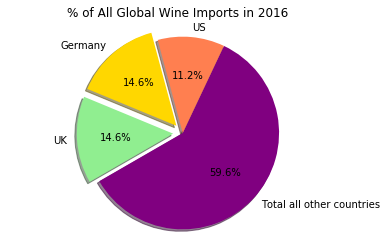

In [50]:
labels = ["Total all other countries", "US", "Germany", "UK"]
sizes = [other_imports, US_imports_2016, Germany_imports_2016, UK_imports_2016]
colors = ["purple", "coral", "Gold", "lightgreen"]
explode = [0,0,0.1,0.1]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        
	autopct="%1.1f%%", shadow=True, startangle=210)
plt.axis("equal")
plt.title("% of All Global Wine Imports in 2016")
plt.savefig("./savedfigures/wineImports.png")
plt.show()


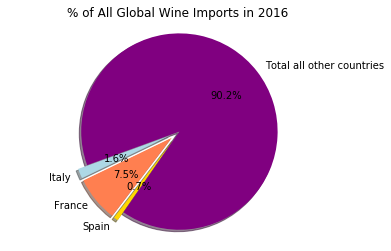

In [51]:
labels = ["Italy","France", "Spain", "Total all other countries"]
sizes = [Italy_imports_2016,French_imports_2016,Spain_imports_2016,90 ]
colors = ["lightblue", "coral", "Gold","purple"]
explode = [.1,.1,.1,0]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        
	autopct="%1.1f%%", shadow=True, startangle=200)
plt.axis("equal")
plt.title("% of All Global Wine Imports in 2016")
plt.savefig("./savedfigures/revwineImports.png")
plt.show()

# Contributor: Kurt Shiple

### Plotting Winery Locations With BaseMap

In [52]:
%matplotlib inline 
import pandas as pd
from shapely.geometry import Point
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import time
# Dependencies
from citipy import citipy

In [53]:
wine_data_to_load = "./csvs/winecoordsandaverages.csv"

winecoordsandaverages = pd.read_csv(wine_data_to_load)

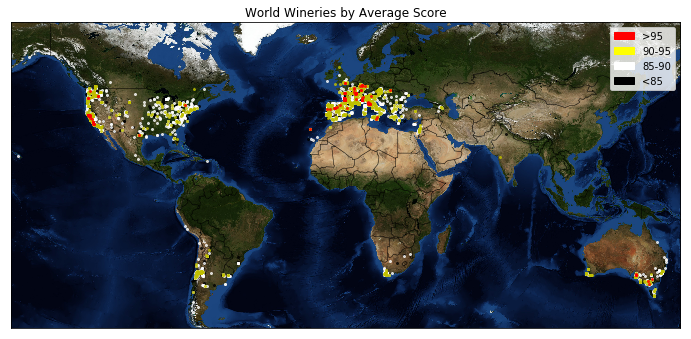

In [54]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
#World Map
m = Basemap(projection='mill',llcrnrlat=-55,urcrnrlat=70,\
            llcrnrlon=-160,urcrnrlon=160,resolution='c')
#m.drawcoastlines()

m.drawcountries()

#m.fillcontinents(color='khaki', lake_color='gainsboro')
#m.drawmapboundary(fill_color='gainsboro')

m.bluemarble()

#4 layers
ptsless85 = winecoordsandaverages[winecoordsandaverages.PointsAverage < 85]
ptsless90 = winecoordsandaverages[(winecoordsandaverages['PointsAverage'] >= 85) & (winecoordsandaverages['PointsAverage'] <= 90)]
ptsless95 = winecoordsandaverages[(winecoordsandaverages['PointsAverage'] >= 90) & (winecoordsandaverages['PointsAverage'] <= 95)]
ptsless100 = winecoordsandaverages[(winecoordsandaverages['PointsAverage'] >= 95) & (winecoordsandaverages['PointsAverage'] <= 100)]
#coords
lat1 = list(ptsless85["Lat"])
lon1 = list(ptsless85["Lng"])

lat2 = list(ptsless90["Lat"])
lon2 = list(ptsless90["Lng"])

lat3 = list(ptsless95["Lat"])
lon3 = list(ptsless95["Lng"])

lat4 = list(ptsless100["Lat"])
lon4 = list(ptsless100["Lng"])
#

x,y = m(lon1,lat1)
m.plot(x,y,'ko',markersize=2,alpha=.75)

x,y = m(lon2,lat2)
m.plot(x,y,'wo',markersize=2,alpha=.75)

x,y = m(lon3,lat3)
m.plot(x,y,'yo',markersize=2,alpha=.75)

x,y = m(lon4,lat4)
m.plot(x,y,'ro',markersize=2,alpha=.75)

#
black_patch = mpatches.Patch(color='black', label='<85')
blue_patch = mpatches.Patch(color='white', label='85-90')
yellow_patch = mpatches.Patch(color='yellow', label='90-95')
red_patch = mpatches.Patch(color='red', label='>95')
plt.legend(handles=[red_patch,yellow_patch,blue_patch,black_patch])
plt.title('World Wineries by Average Score')
plt.savefig(f"./savedfigures/BasemapWorld.png", format="png")
plt.show()


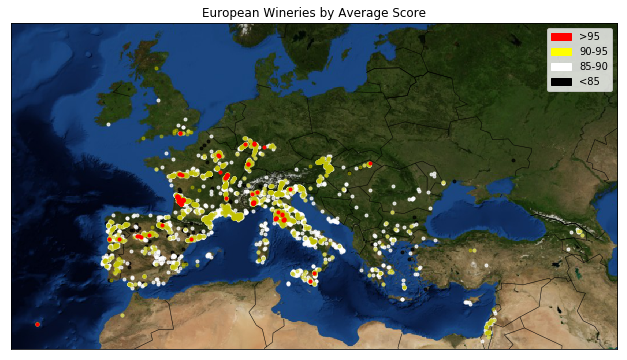

In [55]:
%matplotlib notebook


%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
#World Map
m = Basemap(projection='mill',llcrnrlat=30,urcrnrlat=60,\
            llcrnrlon=-20,urcrnrlon=50,resolution='c')
#m.drawcoastlines()

m.drawcountries()

#m.drawstates()
#m.fillcontinents(color='khaki', lake_color='gainsboro')
#m.drawmapboundary(fill_color='gainsboro')

m.bluemarble()

#4 layers
ptsless85 = winecoordsandaverages[winecoordsandaverages.PointsAverage < 85]
ptsless90 = winecoordsandaverages[(winecoordsandaverages['PointsAverage'] >= 85) & (winecoordsandaverages['PointsAverage'] <= 90)]
ptsless95 = winecoordsandaverages[(winecoordsandaverages['PointsAverage'] >= 90) & (winecoordsandaverages['PointsAverage'] <= 95)]
ptsless100 = winecoordsandaverages[(winecoordsandaverages['PointsAverage'] >= 95) & (winecoordsandaverages['PointsAverage'] <= 100)]
#coords
lat1 = list(ptsless85["Lat"])
lon1 = list(ptsless85["Lng"])

lat2 = list(ptsless90["Lat"])
lon2 = list(ptsless90["Lng"])

lat3 = list(ptsless95["Lat"])
lon3 = list(ptsless95["Lng"])

lat4 = list(ptsless100["Lat"])
lon4 = list(ptsless100["Lng"])
#

x,y = m(lon1,lat1)
m.plot(x,y,'ko',markersize=3,alpha=.75)

x,y = m(lon2,lat2)
m.plot(x,y,'wo',markersize=3,alpha=.75)

x,y = m(lon3,lat3)
m.plot(x,y,'yo',markersize=3,alpha=.5)

x,y = m(lon4,lat4)
m.plot(x,y,'ro',markersize=3,alpha=1)

#
plt.title('European Wineries by Average Score')
black_patch = mpatches.Patch(color='black', label='<85')
blue_patch = mpatches.Patch(color='white', label='85-90')
yellow_patch = mpatches.Patch(color='yellow', label='90-95')
red_patch = mpatches.Patch(color='red', label='>95')
plt.legend(handles=[red_patch,yellow_patch,blue_patch,black_patch])
plt.savefig(f"./savedfigures/BasemapEurope.png", format="png")
plt.show()

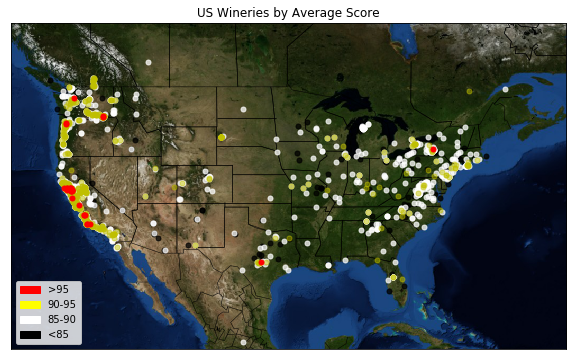

In [56]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
#World Map
m = Basemap(projection='mill',llcrnrlat=20,urcrnrlat=55,\
            llcrnrlon=-130,urcrnrlon=-60,resolution='c')
#m.drawcoastlines()

m.drawcountries()
m.drawstates()
#m.fillcontinents(color='khaki', lake_color='gainsboro')
#m.drawmapboundary(fill_color='gainsboro')


m.bluemarble()

#4 layers
ptsless85 = winecoordsandaverages[winecoordsandaverages.PointsAverage < 85]
ptsless90 = winecoordsandaverages[(winecoordsandaverages['PointsAverage'] >= 85) & (winecoordsandaverages['PointsAverage'] <= 90)]
ptsless95 = winecoordsandaverages[(winecoordsandaverages['PointsAverage'] >= 90) & (winecoordsandaverages['PointsAverage'] <= 95)]
ptsless100 = winecoordsandaverages[(winecoordsandaverages['PointsAverage'] >= 95) & (winecoordsandaverages['PointsAverage'] <= 100)]
#coords
lat1 = list(ptsless85["Lat"])
lon1 = list(ptsless85["Lng"])

lat2 = list(ptsless90["Lat"])
lon2 = list(ptsless90["Lng"])

lat3 = list(ptsless95["Lat"])
lon3 = list(ptsless95["Lng"])

lat4 = list(ptsless100["Lat"])
lon4 = list(ptsless100["Lng"])
#

x,y = m(lon1,lat1)
m.plot(x,y,'ko',markersize=5,alpha=.75)

x,y = m(lon2,lat2)
m.plot(x,y,'wo',markersize=5,alpha=.75)

x,y = m(lon3,lat3)
m.plot(x,y,'yo',markersize=5,alpha=.5)

x,y = m(lon4,lat4)
m.plot(x,y,'ro',markersize=5,alpha=1)

#
plt.title('US Wineries by Average Score')

black_patch = mpatches.Patch(color='black', label='<85')
blue_patch = mpatches.Patch(color='white', label='85-90')
yellow_patch = mpatches.Patch(color='yellow', label='90-95')
red_patch = mpatches.Patch(color='red', label='>95')
plt.legend(handles=[red_patch,yellow_patch,blue_patch,black_patch])

plt.savefig(f"./savedfigures/BasemapUS.png", format="png")

plt.show()

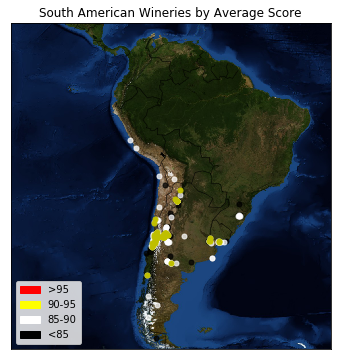

In [57]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
#World Map
m = Basemap(projection='mill',llcrnrlat=-55,urcrnrlat=15,\
            llcrnrlon=-105,urcrnrlon=-30,resolution='c')
#m.drawcoastlines()

m.drawcountries()
#m.drawstates()
#m.fillcontinents(color='khaki', lake_color='gainsboro')
#m.drawmapboundary(fill_color='gainsboro')

m.bluemarble()

#4 layers
ptsless85 = winecoordsandaverages[winecoordsandaverages.PointsAverage < 85]
ptsless90 = winecoordsandaverages[(winecoordsandaverages['PointsAverage'] >= 85) & (winecoordsandaverages['PointsAverage'] <= 90)]
ptsless95 = winecoordsandaverages[(winecoordsandaverages['PointsAverage'] >= 90) & (winecoordsandaverages['PointsAverage'] <= 95)]
ptsless100 = winecoordsandaverages[(winecoordsandaverages['PointsAverage'] >= 95) & (winecoordsandaverages['PointsAverage'] <= 100)]
#coords
lat1 = list(ptsless85["Lat"])
lon1 = list(ptsless85["Lng"])

lat2 = list(ptsless90["Lat"])
lon2 = list(ptsless90["Lng"])

lat3 = list(ptsless95["Lat"])
lon3 = list(ptsless95["Lng"])

lat4 = list(ptsless100["Lat"])
lon4 = list(ptsless100["Lng"])
#

x,y = m(lon1,lat1)
m.plot(x,y,'ko',markersize=5,alpha=.75)

x,y = m(lon2,lat2)
m.plot(x,y,'wo',markersize=5,alpha=.75)

x,y = m(lon3,lat3)
m.plot(x,y,'yo',markersize=5,alpha=1)

x,y = m(lon4,lat4)
m.plot(x,y,'ro',markersize=5,alpha=1)

#
plt.title('South American Wineries by Average Score')

black_patch = mpatches.Patch(color='black', label='<85')
blue_patch = mpatches.Patch(color='white', label='85-90')
yellow_patch = mpatches.Patch(color='yellow', label='90-95')
red_patch = mpatches.Patch(color='red', label='>95')
plt.legend(handles=[red_patch,yellow_patch,blue_patch,black_patch])

plt.savefig(f"./savedfigures/BasemapSouthAmerica.png", format="png")

plt.show()


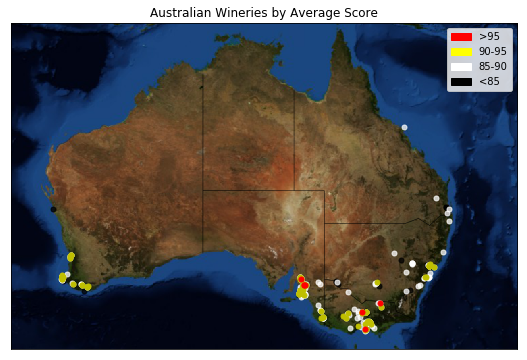

In [58]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
#World Map
m = Basemap(projection='mill',llcrnrlat=-40,urcrnrlat=-10,\
            llcrnrlon=110,urcrnrlon=160,resolution='c')
#m.drawcoastlines()

#m.drawcountries()
m.drawstates()
#m.fillcontinents(color='khaki', lake_color='gainsboro')
#m.drawmapboundary(fill_color='gainsboro')


m.bluemarble()

#4 layers
ptsless85 = winecoordsandaverages[winecoordsandaverages.PointsAverage < 85]
ptsless90 = winecoordsandaverages[(winecoordsandaverages['PointsAverage'] >= 85) & (winecoordsandaverages['PointsAverage'] <= 90)]
ptsless95 = winecoordsandaverages[(winecoordsandaverages['PointsAverage'] >= 90) & (winecoordsandaverages['PointsAverage'] <= 95)]
ptsless100 = winecoordsandaverages[(winecoordsandaverages['PointsAverage'] >= 95) & (winecoordsandaverages['PointsAverage'] <= 100)]
#coords
lat1 = list(ptsless85["Lat"])
lon1 = list(ptsless85["Lng"])

lat2 = list(ptsless90["Lat"])
lon2 = list(ptsless90["Lng"])

lat3 = list(ptsless95["Lat"])
lon3 = list(ptsless95["Lng"])

lat4 = list(ptsless100["Lat"])
lon4 = list(ptsless100["Lng"])
#

x,y = m(lon1,lat1)
m.plot(x,y,'ko',markersize=5,alpha=.75)

x,y = m(lon2,lat2)
m.plot(x,y,'wo',markersize=5,alpha=.75)

x,y = m(lon3,lat3)
m.plot(x,y,'yo',markersize=5,alpha=1)

x,y = m(lon4,lat4)
m.plot(x,y,'ro',markersize=5,alpha=1)

#
plt.title('Australian Wineries by Average Score')

black_patch = mpatches.Patch(color='black', label='<85')
blue_patch = mpatches.Patch(color='white', label='85-90')
yellow_patch = mpatches.Patch(color='yellow', label='90-95')
red_patch = mpatches.Patch(color='red', label='>95')
plt.legend(handles=[red_patch,yellow_patch,blue_patch,black_patch])

plt.savefig(f"./savedfigures/BasemapAustralia.png", format="png")

plt.show()

### Visualizing Wine Specs by Country with GeoPandas

In [59]:
%matplotlib inline 
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import time
import geoplot as gplt
import geoplot.crs as gcrs
# Dependencies
from citipy import citipy

In [60]:
wine_data_to_load = "./csvs/worldwineinforbycountrygeomap.csv"

worldwinemeasurements = pd.read_csv(wine_data_to_load)
del worldwinemeasurements["pop_est"]
del worldwinemeasurements["continent"]
del worldwinemeasurements["name"]
del worldwinemeasurements["iso_a3"]
del worldwinemeasurements["gdp_md_est"]
del worldwinemeasurements["geometry"]

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
worldwithinfo = pd.merge(world, worldwinemeasurements, left_index=True,right_index=True)
worldwithinfo.head(5)

pop_est      continent                  name iso_a3  gdp_md_est  \
0  28400000.0           Asia           Afghanistan    AFG     22270.0   
1  12799293.0         Africa                Angola    AGO    110300.0   
2   3639453.0         Europe               Albania    ALB     21810.0   
3   4798491.0           Asia  United Arab Emirates    ARE    184300.0   
4  40913584.0  South America             Argentina    ARG    573900.0   

                                            geometry  wine_score_mean  \
0  POLYGON ((61.21081709172574 35.65007233330923,...          0.00000   
1  (POLYGON ((16.32652835456705 -5.87747039146621...          0.00000   
2  POLYGON ((20.59024743010491 41.85540416113361,...          0.00000   
3  POLYGON ((51.57951867046327 24.24549713795111,...          0.00000   
4  (POLYGON ((-65.50000000000003 -55.199999999999...         86.71033   

   wine_price_mean  value_list  wine_variety  wine_variety_per_capita  
0         0.000000    0.000000             0                 0.000000  
1         0.000000    0.000000             0                 0.000000  
2         0.000000    0.000000             0                 0.000000  
3         0.000000    0.000000             0                 0.000000  
4        24.510117    3.537736          3756                 0.000092

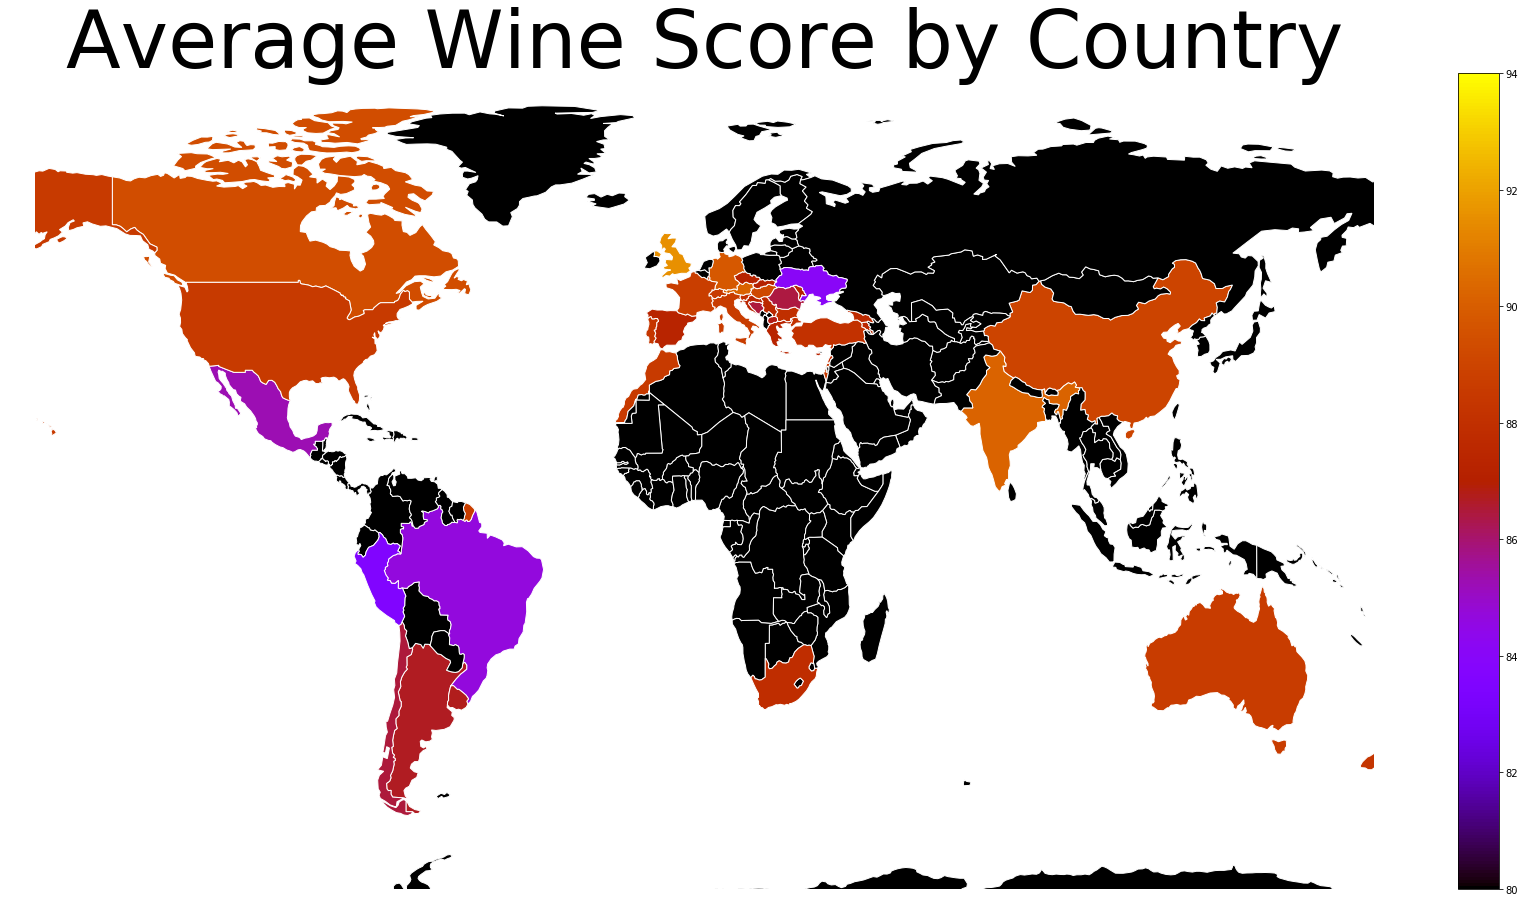

In [61]:
import geoplot
geoplot.choropleth(worldwithinfo, edgecolor='white', extent = (-160,170,-70,90), hue='wine_score_mean',vmin=80,vmax=94,scheme="quantiles", cmap ="gnuplot", k=None, figsize=(30, 15), legend = True)
hfont = {'fontname':'Helvetica'}
plt.title('Average Wine Score by Country', fontdict = {'fontsize' : 80})
plt.savefig(f"/Users/kurtshiple/Desktop/Project1/savedfigures/GeopandasAverageWineScorebyCountry.png", format="png")

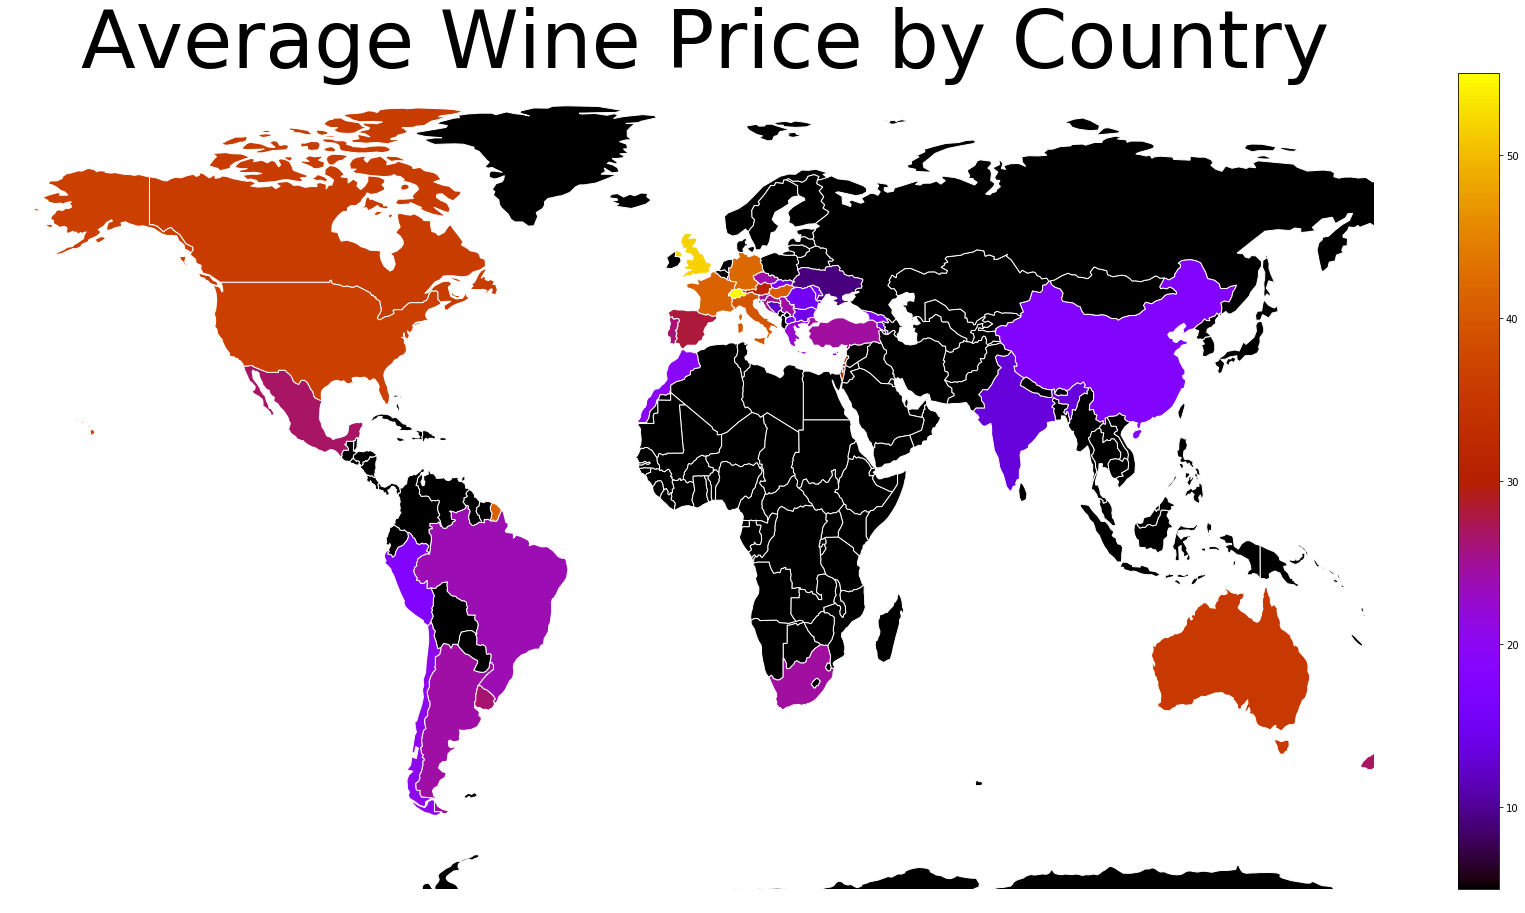

In [62]:
import geoplot
geoplot.choropleth(worldwithinfo, hue='wine_price_mean',edgecolor='white', scheme="fisher_Jenks", cmap='gnuplot', vmin=5,k=None, vmax=55,extent = (-170,170,-70,90), figsize=(30, 15), legend = True)
plt.title('Average Wine Price by Country', fontdict = {'fontsize' : 80})
plt.savefig(f"/Users/kurtshiple/Desktop/Project1/savedfigures/GeopandasAverageWinePricebyCountry.png", format="png")

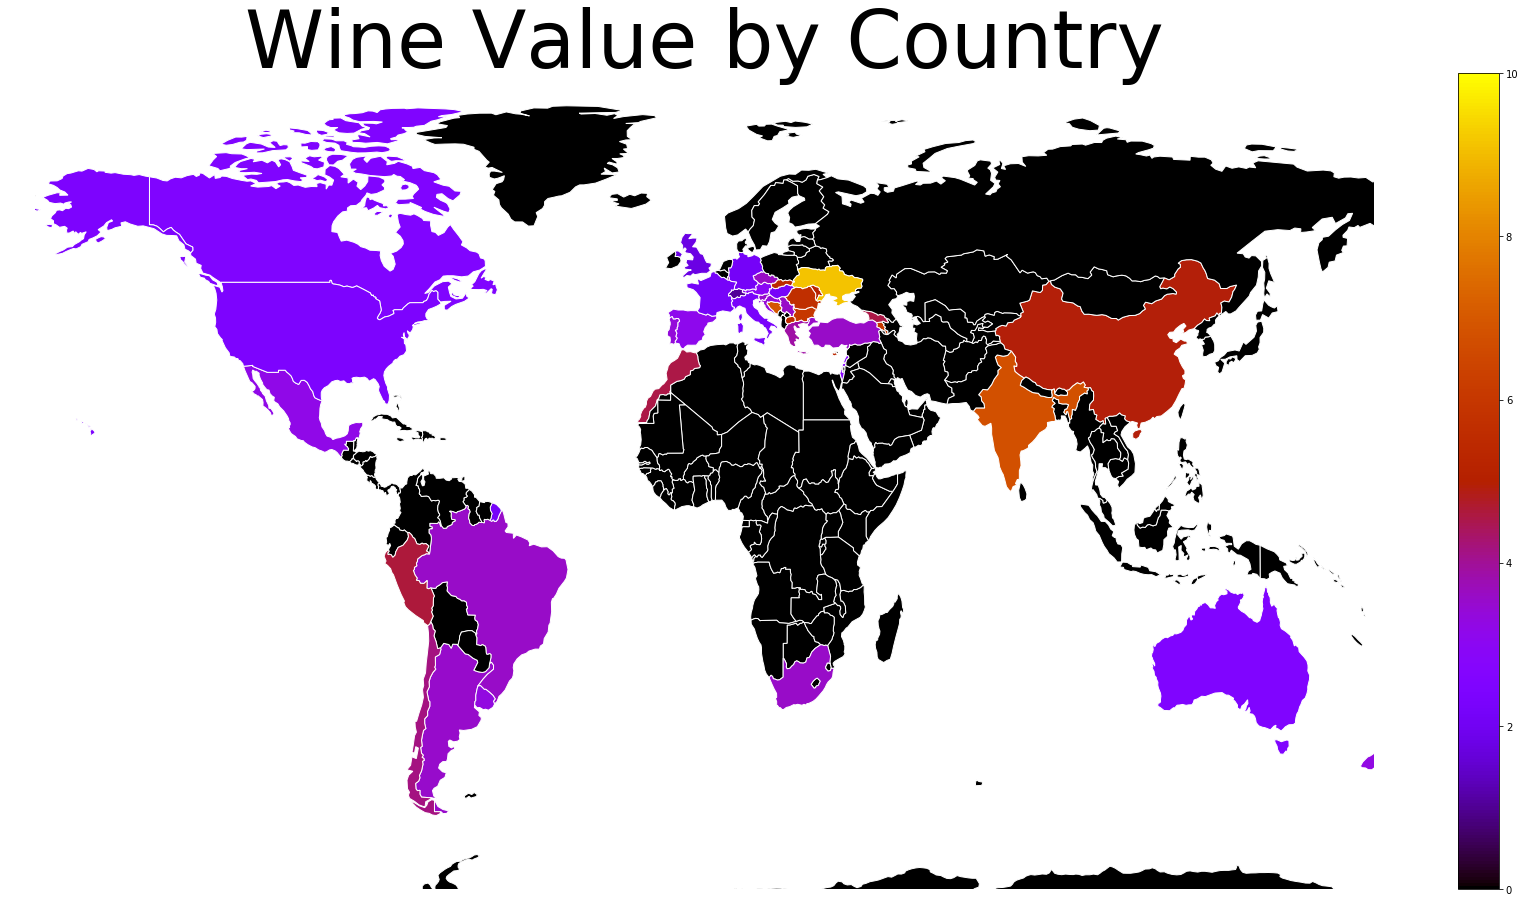

In [63]:
geoplot.choropleth(worldwithinfo, hue='value_list',edgecolor='white', scheme="equal_interval", cmap='gnuplot', vmin=0,k=None, vmax=10,extent = (-170,170,-70,90), figsize=(30, 15), legend = True)
plt.title('Wine Value by Country', fontdict = {'fontsize' : 80})
plt.savefig(f"/Users/kurtshiple/Desktop/Project1/savedfigures/GeopandasWineValuebyCountry.png", format="png")

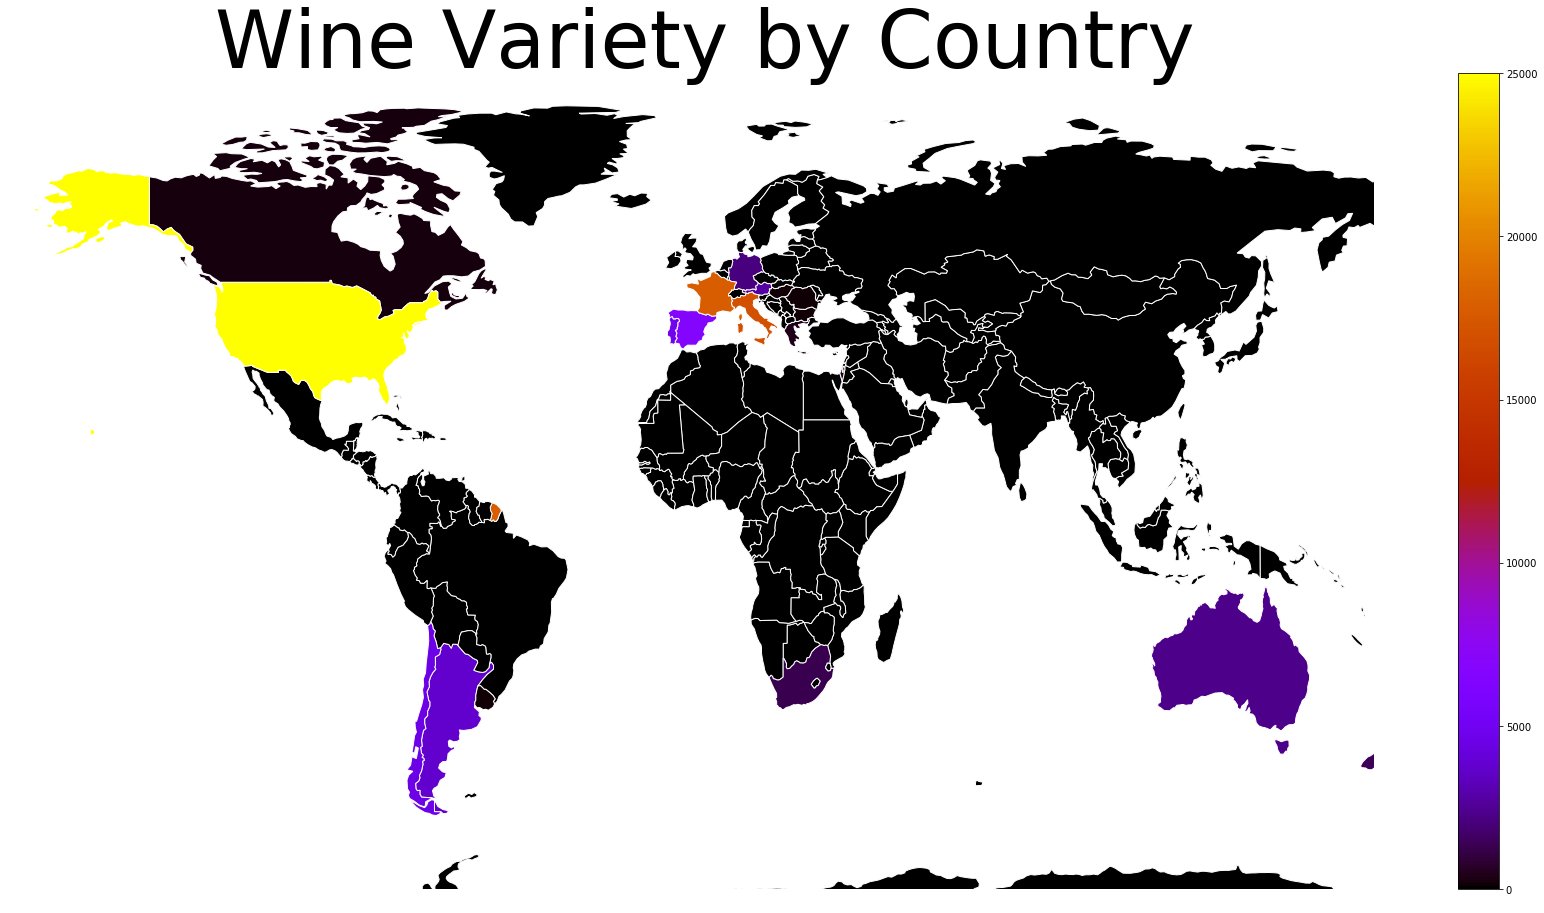

In [64]:
geoplot.choropleth(worldwithinfo, hue='wine_variety',edgecolor='white',scheme="equal_interval", cmap='gnuplot', vmin=0,k=None, vmax=25000,extent = (-170,170,-70,90), figsize=(30, 15),legend = True)
plt.title('Wine Variety by Country', fontdict = {'fontsize' : 80})
plt.savefig(f"/Users/kurtshiple/Desktop/Project1/savedfigures/GeopandasWineVarietybyCountry.png", format="png")

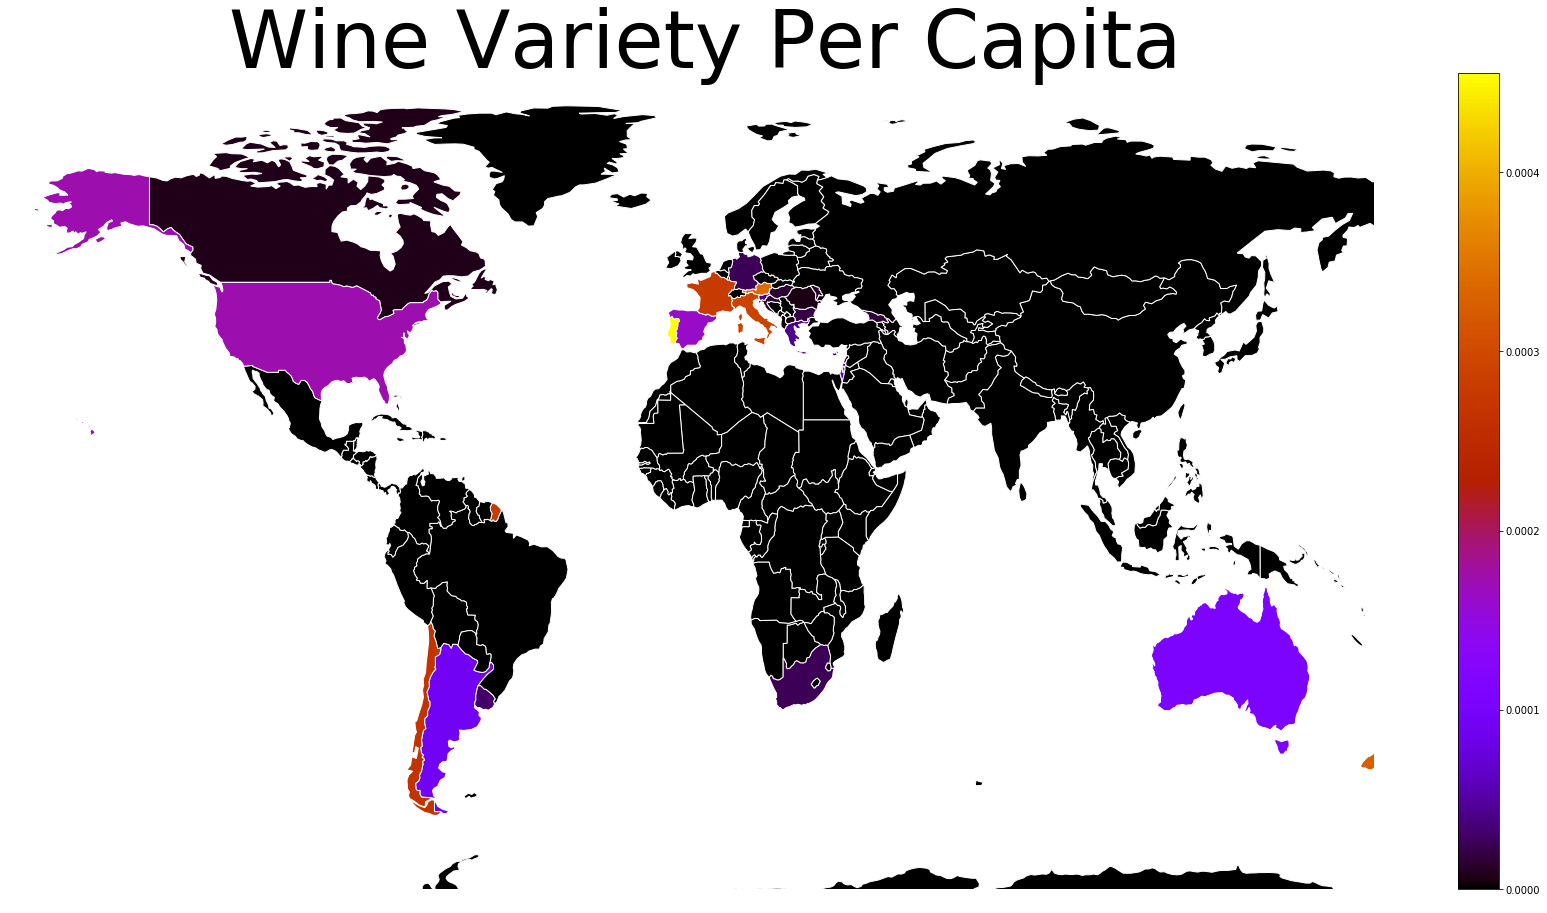

In [65]:
geoplot.choropleth(worldwithinfo, edgecolor='white', extent = (-170,170,-70,90), hue='wine_variety_per_capita',scheme="equal_interval", cmap='gnuplot',k=None, figsize=(30, 15), legend = True)
plt.title('Wine Variety Per Capita', fontdict = {'fontsize' : 80})
plt.savefig(f"/Users/kurtshiple/Desktop/Project1/savedfigures/GeopandasWineVarietyPerCapita.png", format="png")

### Natural Language Processing With TextBlob

In [66]:
#EXAMPLE or Proof of Concept
from textblob.classifiers import NaiveBayesClassifier

train = [
    ('I love this sandwich.', 'pos'),
    ('This is an amazing place!', 'pos'),
    ('I feel very good about these beers.', 'pos'),
    ('It was an average day.', 'neut'),
    ("It's honestly whatever to me", 'neut'),
    ('Yah that would be ok', 'neut'),
    ('I dont really care.', 'neut'),
    ("I can't deal with this", 'neg'),
    ('He is my sworn enemy!', 'neg'),
    ('My boss is horrible.', 'neg')
]
test = [
    ('The beer was good.', 'pos'),
    ('I do not enjoy my job', 'neg'),
    ("I ain't feeling dandy today.", 'neg'),
    ("I feel amazing!", 'pos'),
    ('Gary is a friend of mine.', 'pos'),
    ("I can't believe I'm doing this.", 'neg')
]

In [67]:
cl = NaiveBayesClassifier(train)

In [68]:

cl.classify("Their burgers are awesome")

'neut'

In [69]:
cl.classify("I don't like their pizza.")


'neg'

In [70]:
cl.show_informative_features(10)

Most Informative Features
            contains(is) = False            neut : neg    =      2.4 : 1.0
             contains(I) = True              pos : neut   =      2.1 : 1.0
             contains(I) = False            neut : pos    =      1.9 : 1.0
            contains(It) = False             neg : neut   =      1.8 : 1.0
            contains(is) = True              neg : pos    =      1.7 : 1.0
      contains(horrible) = False            neut : neg    =      1.4 : 1.0
          contains(deal) = False            neut : neg    =      1.4 : 1.0
          contains(This) = False            neut : pos    =      1.4 : 1.0
            contains(ca) = False            neut : neg    =      1.4 : 1.0
      contains(sandwich) = False            neut : pos    =      1.4 : 1.0


In [71]:
#ONTO THE REAL THING
from textblob.classifiers import NaiveBayesClassifier
import pandas as pd
import numpy as np
import time

wine_data_to_load = "./csvs/winemag-data-130k-v2.csv"

wine_data = pd.read_csv(wine_data_to_load)

In [72]:

wine_data.head()


Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

In [73]:
#Dropping Columns not Required
del wine_data["title"]
del wine_data["winery"]
del wine_data["designation"]
del wine_data["province"]
del wine_data["region_1"]
del wine_data["region_2"]
del wine_data["taster_name"]
del wine_data["taster_twitter_handle"]
del wine_data["Unnamed: 0"]

In [74]:
#Most Popular Wines
ef = pd.DataFrame(wine_data.groupby("variety").description.count()).sort_values(by="description",ascending=False)

In [75]:
#WINE SUGGESTION WITH TEXTBLOB

#x = input("How would you describe a wine you would like to try to a sommelier?:  ")

df = wine_data[wine_data['variety'].isin(['Pinot Noir','Chardonnay'])]

msk = np.random.rand(len(df)) < 0.001

train = df[msk]


test = df[~msk]


traintuplecol = list(zip(train.description, train.variety))

cl = NaiveBayesClassifier(traintuplecol)

testtuplecol = list(zip(test.description, test.variety))


print(f"Wine Suggestor Accuracy on Test Pool: {cl.accuracy(testtuplecol)}")
cl.show_informative_features(10)

Wine Suggestor Accuracy on Test Pool: 0.7744129295515462
Most Informative Features
            contains(at) = True           Chardo : Pinot  =      3.5 : 1.0
            contains(an) = True           Chardo : Pinot  =      3.5 : 1.0
           contains(are) = True           Chardo : Pinot  =      3.5 : 1.0
          contains(from) = True           Pinot  : Chardo =      2.9 : 1.0
       contains(acidity) = True           Chardo : Pinot  =      2.7 : 1.0
          contains(very) = True           Chardo : Pinot  =      2.5 : 1.0
         contains(touch) = True           Chardo : Pinot  =      2.5 : 1.0
          contains(ripe) = True           Chardo : Pinot  =      2.4 : 1.0
          contains(that) = True           Chardo : Pinot  =      2.2 : 1.0
            contains(of) = False          Pinot  : Chardo =      2.0 : 1.0


In [76]:
x = input("How would you describe a wine you would like to try to a sommelier?:  ")
print("----------------------------------------------------")
print(f"A {cl.classify(x)} best fits your description.")

How would you describe a wine you would like to try to a sommelier?:  I want a medium_bodied wine with flavors of ripe apple.
----------------------------------------------------
A Chardonnay best fits your description.


### Keyword Counter 

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


wine_data_to_load = "./csvs/winemag-data-130k-v2.csv"

wine_data = pd.read_csv(wine_data_to_load)

In [78]:
#Words we want to ignore
stopwords = ['a', 'about', 'above', 'across', 'after', 'afterwards']
stopwords += ['again', 'against', 'all', 'almost', 'alone', 'along']
stopwords += ['already', 'also', 'although', 'always', 'am', 'among']
stopwords += ['amongst', 'amoungst', 'amount', 'an', 'and', 'another']
stopwords += ['any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere']
stopwords += ['are', 'around', 'as', 'at', 'back', 'be', 'became']
stopwords += ['because', 'become', 'becomes', 'becoming', 'been']
stopwords += ['before', 'beforehand', 'behind', 'being', 'below']
stopwords += ['beside', 'besides', 'between', 'beyond', 'bill', 'both']
stopwords += ['bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant']
stopwords += ['co', 'computer', 'con', 'could', 'couldnt', 'cry', 'de']
stopwords += ['describe', 'detail', 'did', 'do', 'done', 'down', 'due']
stopwords += ['during', 'each', 'eg', 'eight', 'either', 'eleven', 'else']
stopwords += ['elsewhere', 'empty', 'enough', 'etc', 'even', 'ever']
stopwords += ['every', 'everyone', 'everything', 'everywhere', 'except']
stopwords += ['few', 'fifteen', 'fifty', 'fill', 'find', 'fire', 'first']
stopwords += ['five', 'for', 'former', 'formerly', 'forty', 'found']
stopwords += ['four', 'from', 'front', 'full', 'further', 'get', 'give']
stopwords += ['go', 'had', 'has', 'hasnt', 'have', 'he', 'hence', 'her']
stopwords += ['here', 'hereafter', 'hereby', 'herein', 'hereupon', 'hers']
stopwords += ['herself', 'him', 'himself', 'his', 'how', 'however']
stopwords += ['hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed']
stopwords += ['interest', 'into', 'is', 'it', 'its', 'itself', 'keep']
stopwords += ['last', 'latter', 'latterly', 'least', 'less', 'ltd', 'made']
stopwords += ['many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine']
stopwords += ['more', 'moreover', 'most', 'mostly', 'move', 'much']
stopwords += ['must', 'my', 'myself', 'name', 'namely', 'neither', 'never']
stopwords += ['nevertheless', 'next', 'nine', 'no', 'nobody', 'none']
stopwords += ['noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of']
stopwords += ['off', 'often', 'on','once', 'one', 'only', 'onto', 'or']
stopwords += ['other', 'others', 'otherwise', 'our', 'ours', 'ourselves']
stopwords += ['out', 'over', 'own', 'part', 'per', 'perhaps', 'please']
stopwords += ['put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed']
stopwords += ['seeming', 'seems', 'serious', 'several', 'she', 'should']
stopwords += ['show', 'side', 'since', 'sincere', 'six', 'sixty', 'so']
stopwords += ['some', 'somehow', 'someone', 'something', 'sometime']
stopwords += ['sometimes', 'somewhere', 'still', 'such', 'system', 'take']
stopwords += ['ten', 'than', 'that', 'the', 'their', 'them', 'themselves']
stopwords += ['then', 'thence', 'there', 'thereafter', 'thereby']
stopwords += ['therefore', 'therein', 'thereupon', 'these', 'they']
stopwords += ['thick', 'thin', 'third', 'this', 'those', 'though', 'three']
stopwords += ['three', 'through', 'throughout', 'thru', 'thus', 'to']
stopwords += ['together', 'too', 'top', 'toward', 'towards', 'twelve']
stopwords += ['twenty', 'two', 'un', 'under', 'until', 'up', 'upon']
stopwords += ['us', 'very', 'via', 'was', 'we', 'well', 'were', 'what']
stopwords += ['whatever', 'when', 'whence', 'whenever', 'where']
stopwords += ['whereafter', 'whereas', 'whereby', 'wherein', 'whereupon']
stopwords += ['wherever', 'whether', 'which', 'while', 'whither', 'who']
stopwords += ['whoever', 'whole', 'whom', 'whose', 'why', 'will', 'with']
stopwords += ['within', 'without', 'would', 'yet', 'you', 'your']
stopwords += ['yours', 'yourself', 'yourselves']
stopwords += ['tannins.','Sauvignon','Riesling','Riesling.','Syrah','flavors.']
stopwords += ['cherry,','palate','Merlot','finish.','rosé','Cabernet','Chardonnay']
stopwords += ['now.','The', 'This', "it's","It's","A","It'","It","like","wine","Pinot","Drink","flavors"]


In [79]:
del wine_data["designation"]
del wine_data["province"]
del wine_data["region_1"]
del wine_data["region_2"]
del wine_data["taster_name"]
del wine_data["taster_twitter_handle"]
del wine_data["Unnamed: 0"]

wine_data = wine_data.dropna(how='any')

In [80]:
wine_data.head()

country                                        description  points  price  \
1  Portugal  This is ripe and fruity, a wine that is smooth...      87   15.0   
2        US  Tart and snappy, the flavors of lime flesh and...      87   14.0   
3        US  Pineapple rind, lemon pith and orange blossom ...      87   13.0   
4        US  Much like the regular bottling from 2012, this...      87   65.0   
5     Spain  Blackberry and raspberry aromas show a typical...      87   15.0   

                                               title             variety  \
1      Quinta dos Avidagos 2011 Avidagos Red (Douro)      Portuguese Red   
2      Rainstorm 2013 Pinot Gris (Willamette Valley)          Pinot Gris   
3  St. Julian 2013 Reserve Late Harvest Riesling ...            Riesling   
4  Sweet Cheeks 2012 Vintner's Reserve Wild Child...          Pinot Noir   
5  Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...  Tempranillo-Merlot   

                winery  
1  Quinta dos Avidagos  
2            Rainstorm  
3           St. Julian  
4         Sweet Cheeks  
5               Tandem

In [81]:

#Showing most common wines so we can select which to visualize
df = pd.DataFrame(wine_data.groupby("variety").title.count())
mostpopularwines = df.sort_values(by=['title'],ascending=False)
mostpopularwines.head(10)

title
variety                        
Pinot Noir                12785
Chardonnay                11077
Cabernet Sauvignon         9384
Red Blend                  8466
Bordeaux-style Red Blend   5340
Riesling                   4971
Sauvignon Blanc            4780
Syrah                      4086
Rosé                       3261
Merlot                     3061

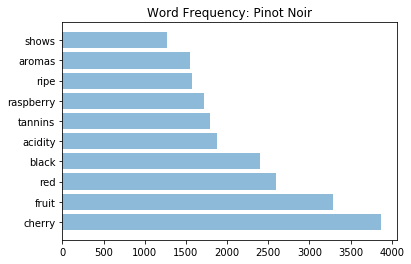

In [82]:
#This code takes the specified variety of wine, iterates through each description, splits the text,
#removes vocabulary that can also be found in "Stop Words" and 
variety = "Pinot Noir"
wvdf = wine_data.loc[wine_data['variety'] == f"{variety}"]
j = wvdf["description"]
wvdf = []
for i in j:
    split_it = i.split()
    for k in split_it:
        wvdf.append(k)
keywvdf = []
for i in wvdf:
    if i not in stopwords:
        keywvdf.append(i)
from collections import Counter
Counter = Counter(keywvdf) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = Counter.most_common(10) 
most_occur_dict = dict(most_occur)

descriptors = most_occur_dict.keys()
descriptorcount = most_occur_dict.values()
descriptorcount_list=list(descriptorcount)


indexes = np.arange(len(descriptors))
plt.barh(indexes, descriptorcount_list, align='center', alpha=0.5)
plt.yticks(indexes, descriptors)
plt.title(f"Word Frequency: {variety}")
plt.savefig(f"./savedfigures/WordFreq{variety}.png", format="png")
plt.show()

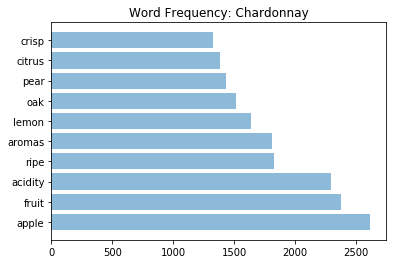

In [83]:
variety = "Chardonnay"
wvdf = wine_data.loc[wine_data['variety'] == f"{variety}"]
j = wvdf["description"]
wvdf = []
for i in j:
    split_it = i.split()
    for k in split_it:
        wvdf.append(k)
keywvdf = []
for i in wvdf:
    if i not in stopwords:
        keywvdf.append(i)
from collections import Counter
Counter = Counter(keywvdf) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = Counter.most_common(10) 
most_occur_dict = dict(most_occur)

descriptors = most_occur_dict.keys()
descriptorcount = most_occur_dict.values()
descriptorcount_list=list(descriptorcount)


indexes = np.arange(len(descriptors))
plt.barh(indexes, descriptorcount_list, align='center', alpha=0.5)
plt.yticks(indexes, descriptors)
plt.title(f"Word Frequency: {variety}")
plt.savefig(f"./savedfigures/WordFreq{variety}.png", format="png")

plt.show()

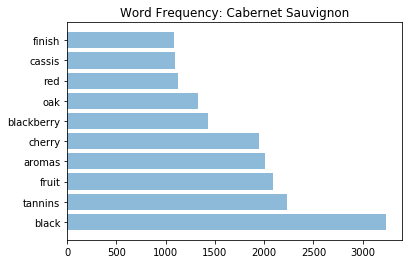

In [84]:
variety = "Cabernet Sauvignon"
wvdf = wine_data.loc[wine_data['variety'] == f"{variety}"]
j = wvdf["description"]
wvdf = []
for i in j:
    split_it = i.split()
    for k in split_it:
        wvdf.append(k)
keywvdf = []
for i in wvdf:
    if i not in stopwords:
        keywvdf.append(i)
from collections import Counter
Counter = Counter(keywvdf) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = Counter.most_common(10) 
most_occur_dict = dict(most_occur)

descriptors = most_occur_dict.keys()
descriptorcount = most_occur_dict.values()
descriptorcount_list=list(descriptorcount)


indexes = np.arange(len(descriptors))
plt.barh(indexes, descriptorcount_list, align='center', alpha=0.5)
plt.yticks(indexes, descriptors)
plt.title(f"Word Frequency: {variety}")
plt.savefig(f"./savedfigures/WordFreq{variety}.png", format="png")

plt.show()


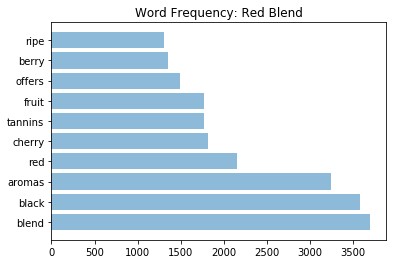

In [85]:
variety = "Red Blend"
wvdf = wine_data.loc[wine_data['variety'] == f"{variety}"]
j = wvdf["description"]
wvdf = []
for i in j:
    split_it = i.split()
    for k in split_it:
        wvdf.append(k)
keywvdf = []
for i in wvdf:
    if i not in stopwords:
        keywvdf.append(i)
from collections import Counter
Counter = Counter(keywvdf) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = Counter.most_common(10) 
most_occur_dict = dict(most_occur)

descriptors = most_occur_dict.keys()
descriptorcount = most_occur_dict.values()
descriptorcount_list=list(descriptorcount)


indexes = np.arange(len(descriptors))
plt.barh(indexes, descriptorcount_list, align='center', alpha=0.5)
plt.yticks(indexes, descriptors)
plt.title(f"Word Frequency: {variety}")
plt.savefig(f"./savedfigures/WordFreq{variety}.png", format="png")

plt.show()

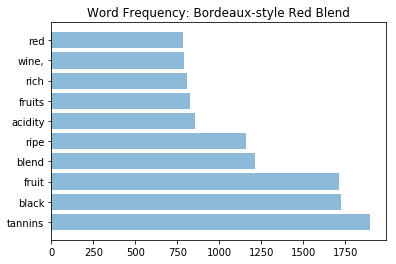

In [86]:
variety = "Bordeaux-style Red Blend"
wvdf = wine_data.loc[wine_data['variety'] == f"{variety}"]
j = wvdf["description"]
wvdf = []
for i in j:
    split_it = i.split()
    for k in split_it:
        wvdf.append(k)
keywvdf = []
for i in wvdf:
    if i not in stopwords:
        keywvdf.append(i)
from collections import Counter
Counter = Counter(keywvdf) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = Counter.most_common(10) 
most_occur_dict = dict(most_occur)

descriptors = most_occur_dict.keys()
descriptorcount = most_occur_dict.values()
descriptorcount_list=list(descriptorcount)


indexes = np.arange(len(descriptors))
plt.barh(indexes, descriptorcount_list, align='center', alpha=0.5)
plt.yticks(indexes, descriptors)
plt.title(f"Word Frequency: {variety}")
plt.savefig(f"./savedfigures/WordFreq{variety}.png", format="png")

plt.show()

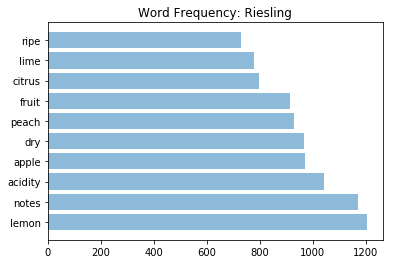

In [87]:
variety = "Riesling"
wvdf = wine_data.loc[wine_data['variety'] == f"{variety}"]
j = wvdf["description"]
wvdf = []
for i in j:
    split_it = i.split()
    for k in split_it:
        wvdf.append(k)
keywvdf = []
for i in wvdf:
    if i not in stopwords:
        keywvdf.append(i)
from collections import Counter
Counter = Counter(keywvdf) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = Counter.most_common(10) 
most_occur_dict = dict(most_occur)

descriptors = most_occur_dict.keys()
descriptorcount = most_occur_dict.values()
descriptorcount_list=list(descriptorcount)


indexes = np.arange(len(descriptors))
plt.barh(indexes, descriptorcount_list, align='center', alpha=0.5)
plt.yticks(indexes, descriptors)
plt.title(f"Word Frequency: {variety}")
plt.savefig(f"./savedfigures/WordFreq{variety}.png", format="png")

plt.show()

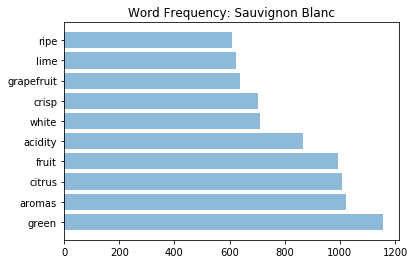

In [88]:
variety = "Sauvignon Blanc"
wvdf = wine_data.loc[wine_data['variety'] == f"{variety}"]
j = wvdf["description"]
wvdf = []
for i in j:
    split_it = i.split()
    for k in split_it:
        wvdf.append(k)
keywvdf = []
for i in wvdf:
    if i not in stopwords:
        keywvdf.append(i)
from collections import Counter
Counter = Counter(keywvdf) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = Counter.most_common(10) 
most_occur_dict = dict(most_occur)

descriptors = most_occur_dict.keys()
descriptorcount = most_occur_dict.values()
descriptorcount_list=list(descriptorcount)


indexes = np.arange(len(descriptors))
plt.barh(indexes, descriptorcount_list, align='center', alpha=0.5)
plt.yticks(indexes, descriptors)
plt.title(f"Word Frequency: {variety}")
plt.savefig(f"./savedfigures/WordFreq{variety}.png", format="png")

plt.show()

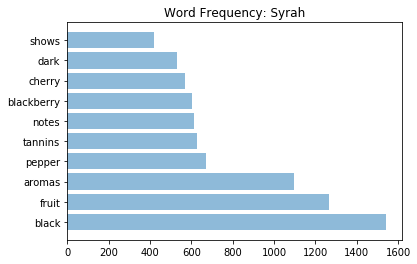

In [89]:
variety = "Syrah"
wvdf = wine_data.loc[wine_data['variety'] == f"{variety}"]
j = wvdf["description"]
wvdf = []
for i in j:
    split_it = i.split()
    for k in split_it:
        wvdf.append(k)
keywvdf = []
for i in wvdf:
    if i not in stopwords:
        keywvdf.append(i)
from collections import Counter
Counter = Counter(keywvdf) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = Counter.most_common(10) 
most_occur_dict = dict(most_occur)

descriptors = most_occur_dict.keys()
descriptorcount = most_occur_dict.values()
descriptorcount_list=list(descriptorcount)


indexes = np.arange(len(descriptors))
plt.barh(indexes, descriptorcount_list, align='center', alpha=0.5)
plt.yticks(indexes, descriptors)
plt.title(f"Word Frequency: {variety}")
plt.savefig(f"./savedfigures/WordFreq{variety}.png", format="png")

plt.show()

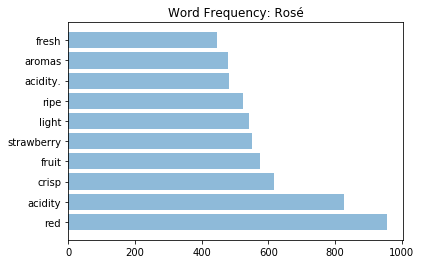

In [90]:
variety = "Rosé"
wvdf = wine_data.loc[wine_data['variety'] == f"{variety}"]
j = wvdf["description"]
wvdf = []
for i in j:
    split_it = i.split()
    for k in split_it:
        wvdf.append(k)
keywvdf = []
for i in wvdf:
    if i not in stopwords:
        keywvdf.append(i)
from collections import Counter
Counter = Counter(keywvdf) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = Counter.most_common(10) 
most_occur_dict = dict(most_occur)

descriptors = most_occur_dict.keys()
descriptorcount = most_occur_dict.values()
descriptorcount_list=list(descriptorcount)


indexes = np.arange(len(descriptors))
plt.barh(indexes, descriptorcount_list, align='center', alpha=0.5)
plt.yticks(indexes, descriptors)
plt.title(f"Word Frequency: {variety}")
plt.savefig(f"./savedfigures/WordFreq{variety}.png", format="png")

plt.show()

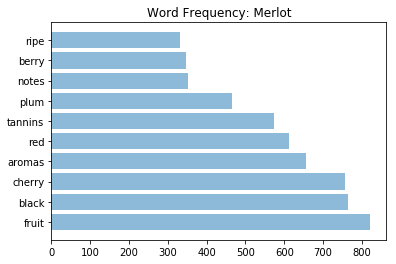

In [91]:
variety = "Merlot"
wvdf = wine_data.loc[wine_data['variety'] == f"{variety}"]
j = wvdf["description"]
wvdf = []
for i in j:
    split_it = i.split()
    for k in split_it:
        wvdf.append(k)
keywvdf = []
for i in wvdf:
    if i not in stopwords:
        keywvdf.append(i)
from collections import Counter
Counter = Counter(keywvdf) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = Counter.most_common(10) 
most_occur_dict = dict(most_occur)

descriptors = most_occur_dict.keys()
descriptorcount = most_occur_dict.values()
descriptorcount_list=list(descriptorcount)


indexes = np.arange(len(descriptors))
plt.barh(indexes, descriptorcount_list, align='center', alpha=0.5)
plt.yticks(indexes, descriptors)
plt.title(f"Word Frequency: {variety}")
plt.savefig(f"./savedfigures/WordFreq{variety}.png", format="png")

plt.show()


### Wordcloud Generator

In [92]:
%matplotlib inline
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
wine_data_to_load = "./csvs/winemag-data-130k-v2.csv"

wine_data = pd.read_csv(wine_data_to_load)

In [93]:
#Words we want to ignore
stopwords = ['a', 'about', 'above', 'across', 'after', 'afterwards']
stopwords += ['again', 'against', 'all', 'almost', 'alone', 'along']
stopwords += ['already', 'also', 'although', 'always', 'am', 'among']
stopwords += ['amongst', 'amoungst', 'amount', 'an', 'and', 'another']
stopwords += ['any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere']
stopwords += ['are', 'around', 'as', 'at', 'back', 'be', 'became']
stopwords += ['because', 'become', 'becomes', 'becoming', 'been']
stopwords += ['before', 'beforehand', 'behind', 'being', 'below']
stopwords += ['beside', 'besides', 'between', 'beyond', 'bill', 'both']
stopwords += ['bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant']
stopwords += ['co', 'computer', 'con', 'could', 'couldnt', 'cry', 'de']
stopwords += ['describe', 'detail', 'did', 'do', 'done', 'down', 'due']
stopwords += ['during', 'each', 'eg', 'eight', 'either', 'eleven', 'else']
stopwords += ['elsewhere', 'empty', 'enough', 'etc', 'even', 'ever']
stopwords += ['every', 'everyone', 'everything', 'everywhere', 'except']
stopwords += ['few', 'fifteen', 'fifty', 'fill', 'find', 'fire', 'first']
stopwords += ['five', 'for', 'former', 'formerly', 'forty', 'found']
stopwords += ['four', 'from', 'front', 'full', 'further', 'get', 'give']
stopwords += ['go', 'had', 'has', 'hasnt', 'have', 'he', 'hence', 'her']
stopwords += ['here', 'hereafter', 'hereby', 'herein', 'hereupon', 'hers']
stopwords += ['herself', 'him', 'himself', 'his', 'how', 'however']
stopwords += ['hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed']
stopwords += ['interest', 'into', 'is', 'it', 'its', 'itself', 'keep']
stopwords += ['last', 'latter', 'latterly', 'least', 'less', 'ltd', 'made']
stopwords += ['many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine']
stopwords += ['more', 'moreover', 'most', 'mostly', 'move', 'much']
stopwords += ['must', 'my', 'myself', 'name', 'namely', 'neither', 'never']
stopwords += ['nevertheless', 'next', 'nine', 'no', 'nobody', 'none']
stopwords += ['noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of']
stopwords += ['off', 'often', 'on','once', 'one', 'only', 'onto', 'or']
stopwords += ['other', 'others', 'otherwise', 'our', 'ours', 'ourselves']
stopwords += ['out', 'over', 'own', 'part', 'per', 'perhaps', 'please']
stopwords += ['put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed']
stopwords += ['seeming', 'seems', 'serious', 'several', 'she', 'should']
stopwords += ['show', 'side', 'since', 'sincere', 'six', 'sixty', 'so']
stopwords += ['some', 'somehow', 'someone', 'something', 'sometime']
stopwords += ['sometimes', 'somewhere', 'still', 'such', 'system', 'take']
stopwords += ['ten', 'than', 'that', 'the', 'their', 'them', 'themselves']
stopwords += ['then', 'thence', 'there', 'thereafter', 'thereby']
stopwords += ['therefore', 'therein', 'thereupon', 'these', 'they']
stopwords += ['thick', 'thin', 'third', 'this', 'those', 'though', 'three']
stopwords += ['three', 'through', 'throughout', 'thru', 'thus', 'to']
stopwords += ['together', 'too', 'top', 'toward', 'towards', 'twelve']
stopwords += ['twenty', 'two', 'un', 'under', 'until', 'up', 'upon']
stopwords += ['us', 'very', 'via', 'was', 'we', 'well', 'were', 'what']
stopwords += ['whatever', 'when', 'whence', 'whenever', 'where']
stopwords += ['whereafter', 'whereas', 'whereby', 'wherein', 'whereupon']
stopwords += ['wherever', 'whether', 'which', 'while', 'whither', 'who']
stopwords += ['whoever', 'whole', 'whom', 'whose', 'why', 'will', 'with']
stopwords += ['within', 'without', 'would', 'yet', 'you', 'your']
stopwords += ['yours', 'yourself', 'yourselves']
stopwords += ['The', 'This', "it's","It's","A","It'","It","like","wine","Pinot","Drink"]

In [94]:
del wine_data["designation"]
del wine_data["province"]
del wine_data["region_1"]
del wine_data["region_2"]
del wine_data["taster_name"]
del wine_data["taster_twitter_handle"]
del wine_data["Unnamed: 0"]

In [95]:
wine_data = wine_data.dropna(how='any')
wine_data.head()

country                                        description  points  price  \
1  Portugal  This is ripe and fruity, a wine that is smooth...      87   15.0   
2        US  Tart and snappy, the flavors of lime flesh and...      87   14.0   
3        US  Pineapple rind, lemon pith and orange blossom ...      87   13.0   
4        US  Much like the regular bottling from 2012, this...      87   65.0   
5     Spain  Blackberry and raspberry aromas show a typical...      87   15.0   

                                               title             variety  \
1      Quinta dos Avidagos 2011 Avidagos Red (Douro)      Portuguese Red   
2      Rainstorm 2013 Pinot Gris (Willamette Valley)          Pinot Gris   
3  St. Julian 2013 Reserve Late Harvest Riesling ...            Riesling   
4  Sweet Cheeks 2012 Vintner's Reserve Wild Child...          Pinot Noir   
5  Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...  Tempranillo-Merlot   

                winery  
1  Quinta dos Avidagos  
2            Rainstorm  
3           St. Julian  
4         Sweet Cheeks  
5               Tandem

In [96]:
text = " ".join(review for review in wine_data["description"])
print ("There are {} words in the combination of all review.".format(len(text)))


There are 29653208 words in the combination of all review.


In [97]:
# Join all reviews:

world = " ".join(review for review in wine_data.description)

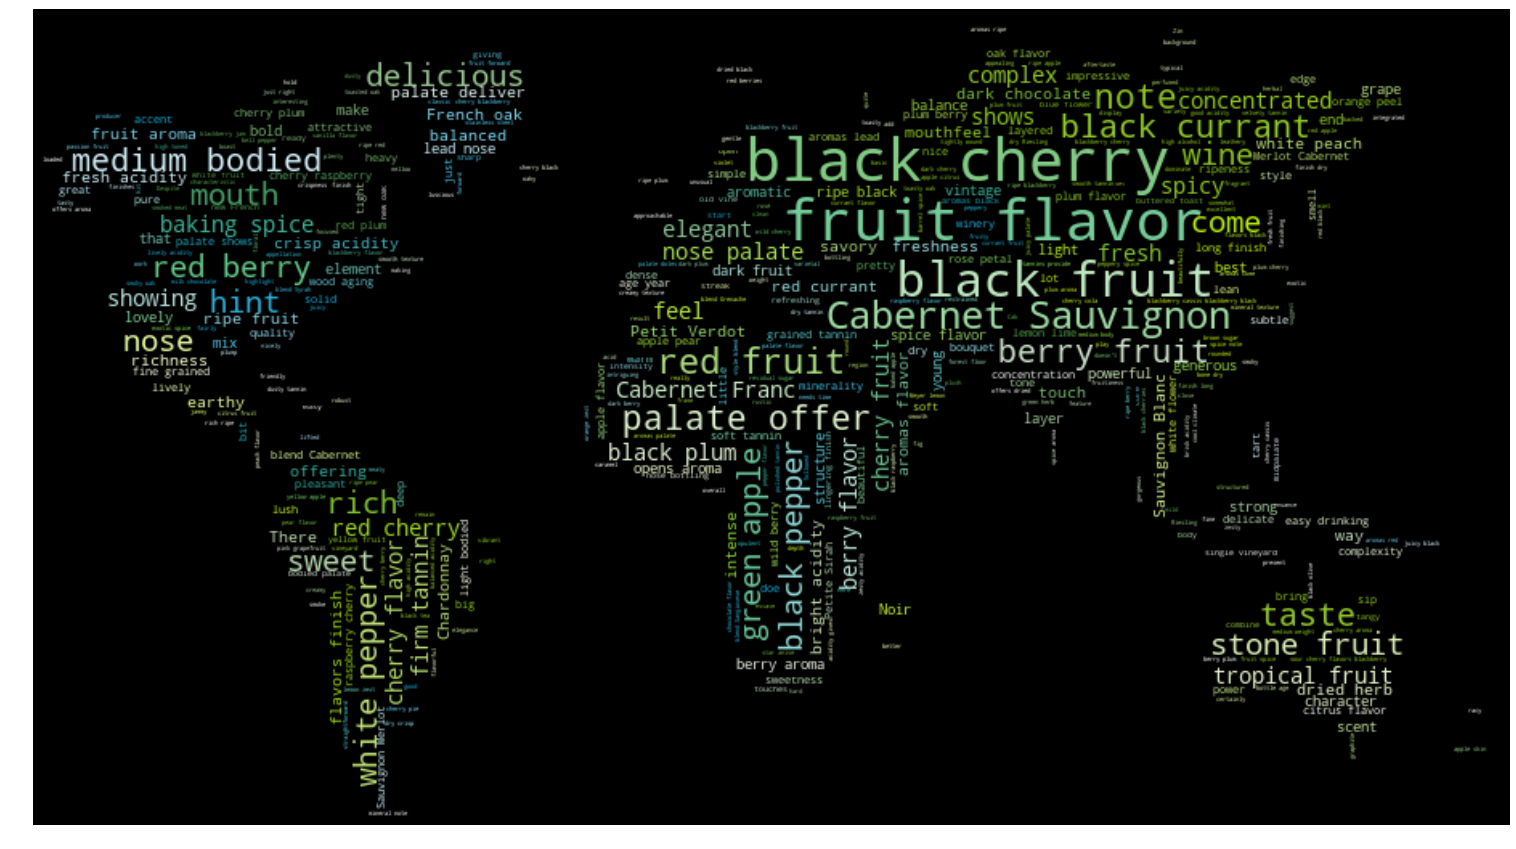

In [99]:
# Generate a word cloud image
mask = np.array(Image.open("./wordcloudfillinpic/worldmap.jpg"))
wordcloud_world = WordCloud(stopwords=stopwords, background_color="black", mode="RGBA", max_words=2000, mask=mask).generate(world)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[30,15])
plt.imshow(wordcloud_world.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("./savedfigures/worldwinewordcloud.png", format="png")

plt.show()